In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np

In [3]:
from sklearn.preprocessing import MultiLabelBinarizer

In [4]:
df_movieB = pd.read_csv("./data/movie_df.csv")
#df_titleBasics = read_file("./data/title.basics.tsv.gz")

In [5]:
df_movieB.head()

movieId     tconst                 primaryTitle  \
0        1  tt0114709                    Toy Story   
1        2  tt0113497                      Jumanji   
2        3  tt0113228             Grumpier Old Men   
3        4  tt0114885            Waiting to Exhale   
4        5  tt0113041  Father of the Bride Part II   

                 originalTitle  startYear  runtimeMinutes  \
0                    Toy Story       1995              81   
1                      Jumanji       1995             104   
2             Grumpier Old Men       1995             101   
3            Waiting to Exhale       1995             124   
4  Father of the Bride Part II       1995             106   

                       genres  directors  \
0  Adventure,Animation,Comedy  nm0005124   
1     Adventure,Comedy,Family  nm0002653   
2              Comedy,Romance  nm0222043   
3        Comedy,Drama,Romance  nm0001845   
4       Comedy,Family,Romance  nm0796124   

                                             writers  averageRating  numVotes  \
0  nm0005124,nm0230032,nm0004056,nm0710020,nm0923...            8.3   1097902   
1            nm0378144,nm0852430,nm0833164,nm0885575            7.1    387736   
2                                          nm0425756            6.7     30240   
3                                nm0573334,nm0060103            6.0     12579   
4            nm0352443,nm0329304,nm0583600,nm0796124            6.1     42542   

      actor1     actor2                                   tags_list  \
0  nm0000158  nm0000741     1036,244,786,589,64,588,785,204,186,536   
1  nm0000245  nm0000379       29,584,204,588,951,377,62,415,203,374   
2  nm0000527  nm0000493     451,901,902,230,742,264,299,464,863,397   
3  nm0001365  nm0000291  1116,201,439,864,1062,742,846,1003,388,967   
4  nm0000188  nm0000473    451,383,902,901,230,808,374,1102,768,417   

  runtimeCat   wRating original_language  \
0      short  8.298230                en   
1    average  7.098083                en   
2    average  6.688949                en   
3    average  6.026127                en   
4    average  6.105851                en   

                                            overview  
0  Led by Woody, Andy's toys live happily in his ...  
1  When siblings Judy and Peter discover an encha...  
2  A family wedding reignites the ancient feud be...  
3  Cheated on, mistreated and stepped on, the wom...  
4  Just when George Banks has recovered from his ...

In [6]:
df_movieB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22645 entries, 0 to 22644
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movieId            22645 non-null  int64  
 1   tconst             22645 non-null  object 
 2   primaryTitle       22645 non-null  object 
 3   originalTitle      22645 non-null  object 
 4   startYear          22645 non-null  int64  
 5   runtimeMinutes     22645 non-null  int64  
 6   genres             22645 non-null  object 
 7   directors          22645 non-null  object 
 8   writers            22645 non-null  object 
 9   averageRating      22645 non-null  float64
 10  numVotes           22645 non-null  int64  
 11  actor1             22645 non-null  object 
 12  actor2             22645 non-null  object 
 13  tags_list          5878 non-null   object 
 14  runtimeCat         22645 non-null  object 
 15  wRating            22645 non-null  float64
 16  original_language  226

In [7]:
#df_movieB['genres'] = df_movieB['genres'].str.split(', ')  #creates a separate column for each unique multi-genre entry

In [8]:
#df_movieB['genres'] = df_movieB['genres'].str.replace(', ', ',').str.split(',')  #creates a separate column for each unique multi-genre entry as previous


In [9]:
# First, split and explode to get individual genres
genres_split = df_movieB['genres'].str.replace(', ', ',').str.split(',').explode()

In [10]:
# Get unique genres
unique_genres = genres_split.unique()

In [11]:
unique_genres

array(['Adventure', 'Animation', 'Comedy', 'Family', 'Romance', 'Drama',
       'Action', 'Crime', 'Thriller', 'Fantasy', 'Horror', 'Biography',
       'History', 'Mystery', 'Sci-Fi', 'War', 'Sport', 'Music',
       'Documentary', 'Musical', 'Western', 'Film-Noir', '\\N', 'News',
       'Adult'], dtype=object)

In [12]:
# Create binary columns for each unique genre
for genre in unique_genres:
    df_movieB[genre] = df_movieB['genres'].str.contains(genre, regex=False).astype(int)

In [13]:
df_movieB.head()

movieId     tconst                 primaryTitle  \
0        1  tt0114709                    Toy Story   
1        2  tt0113497                      Jumanji   
2        3  tt0113228             Grumpier Old Men   
3        4  tt0114885            Waiting to Exhale   
4        5  tt0113041  Father of the Bride Part II   

                 originalTitle  startYear  runtimeMinutes  \
0                    Toy Story       1995              81   
1                      Jumanji       1995             104   
2             Grumpier Old Men       1995             101   
3            Waiting to Exhale       1995             124   
4  Father of the Bride Part II       1995             106   

                       genres  directors  \
0  Adventure,Animation,Comedy  nm0005124   
1     Adventure,Comedy,Family  nm0002653   
2              Comedy,Romance  nm0222043   
3        Comedy,Drama,Romance  nm0001845   
4       Comedy,Family,Romance  nm0796124   

                                             writers  averageRating  ...  War  \
0  nm0005124,nm0230032,nm0004056,nm0710020,nm0923...            8.3  ...    0   
1            nm0378144,nm0852430,nm0833164,nm0885575            7.1  ...    0   
2                                          nm0425756            6.7  ...    0   
3                                nm0573334,nm0060103            6.0  ...    0   
4            nm0352443,nm0329304,nm0583600,nm0796124            6.1  ...    0   

  Sport Music Documentary Musical  Western Film-Noir \N  News  Adult  
0     0     0           0       0        0         0  0     0      0  
1     0     0           0       0        0         0  0     0      0  
2     0     0           0       0        0         0  0     0      0  
3     0     0           0       0        0         0  0     0      0  
4     0     0           0       0        0         0  0     0      0  

[5 rows x 43 columns]

In [14]:
df_movieB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22645 entries, 0 to 22644
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movieId            22645 non-null  int64  
 1   tconst             22645 non-null  object 
 2   primaryTitle       22645 non-null  object 
 3   originalTitle      22645 non-null  object 
 4   startYear          22645 non-null  int64  
 5   runtimeMinutes     22645 non-null  int64  
 6   genres             22645 non-null  object 
 7   directors          22645 non-null  object 
 8   writers            22645 non-null  object 
 9   averageRating      22645 non-null  float64
 10  numVotes           22645 non-null  int64  
 11  actor1             22645 non-null  object 
 12  actor2             22645 non-null  object 
 13  tags_list          5878 non-null   object 
 14  runtimeCat         22645 non-null  object 
 15  wRating            22645 non-null  float64
 16  original_language  226

In [15]:
genre_columns = unique_genres

In [16]:
genre_columns

array(['Adventure', 'Animation', 'Comedy', 'Family', 'Romance', 'Drama',
       'Action', 'Crime', 'Thriller', 'Fantasy', 'Horror', 'Biography',
       'History', 'Mystery', 'Sci-Fi', 'War', 'Sport', 'Music',
       'Documentary', 'Musical', 'Western', 'Film-Noir', '\\N', 'News',
       'Adult'], dtype=object)

In [ ]:
###Visuals per genre, IMDB, reduced dataset per movie

In [ ]:
# Create correlation matrix of genres

Text(0.5, 1.0, 'Genre Correlations')

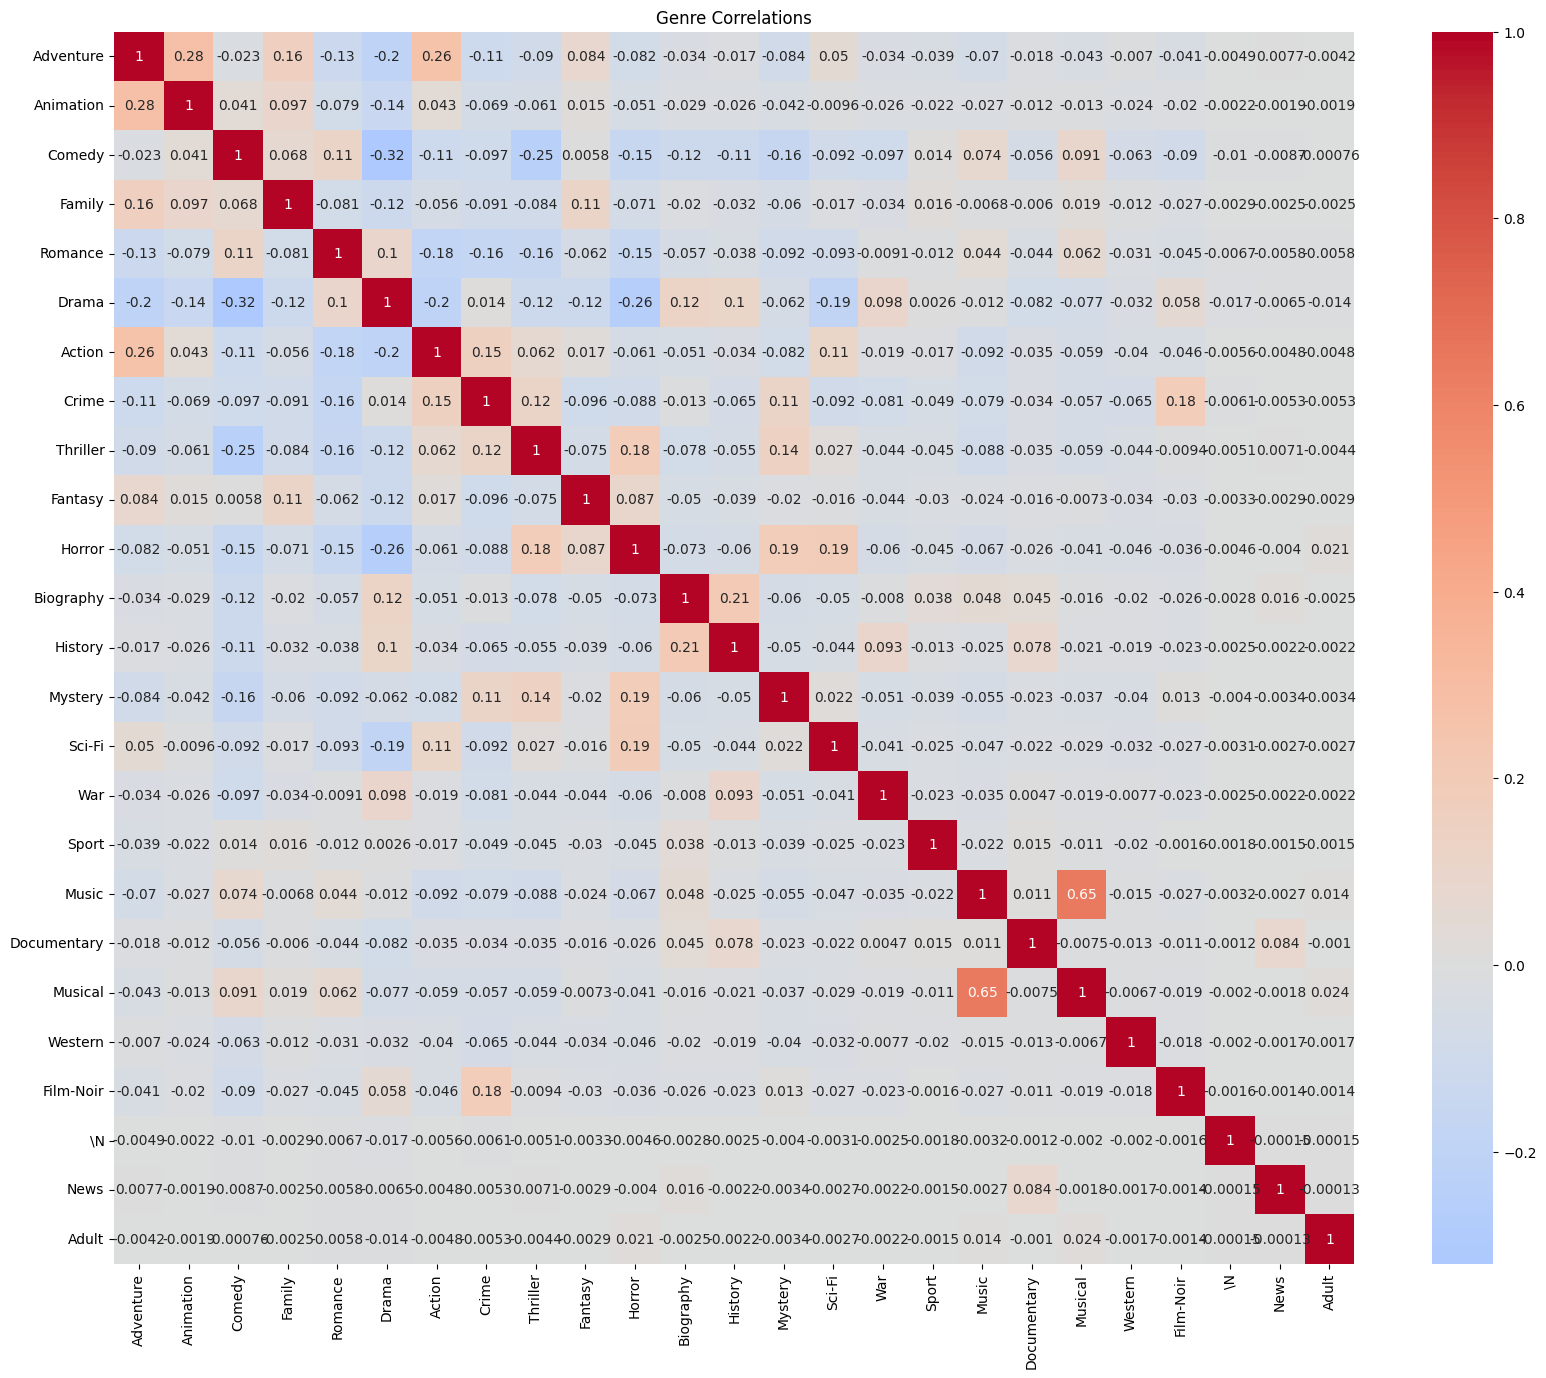

In [17]:
corr = df_movieB[genre_columns].corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Genre Correlations')

In [ ]:
# Count how often genres appear together

Text(0.5, 1.0, 'Genre Co-occurrences')

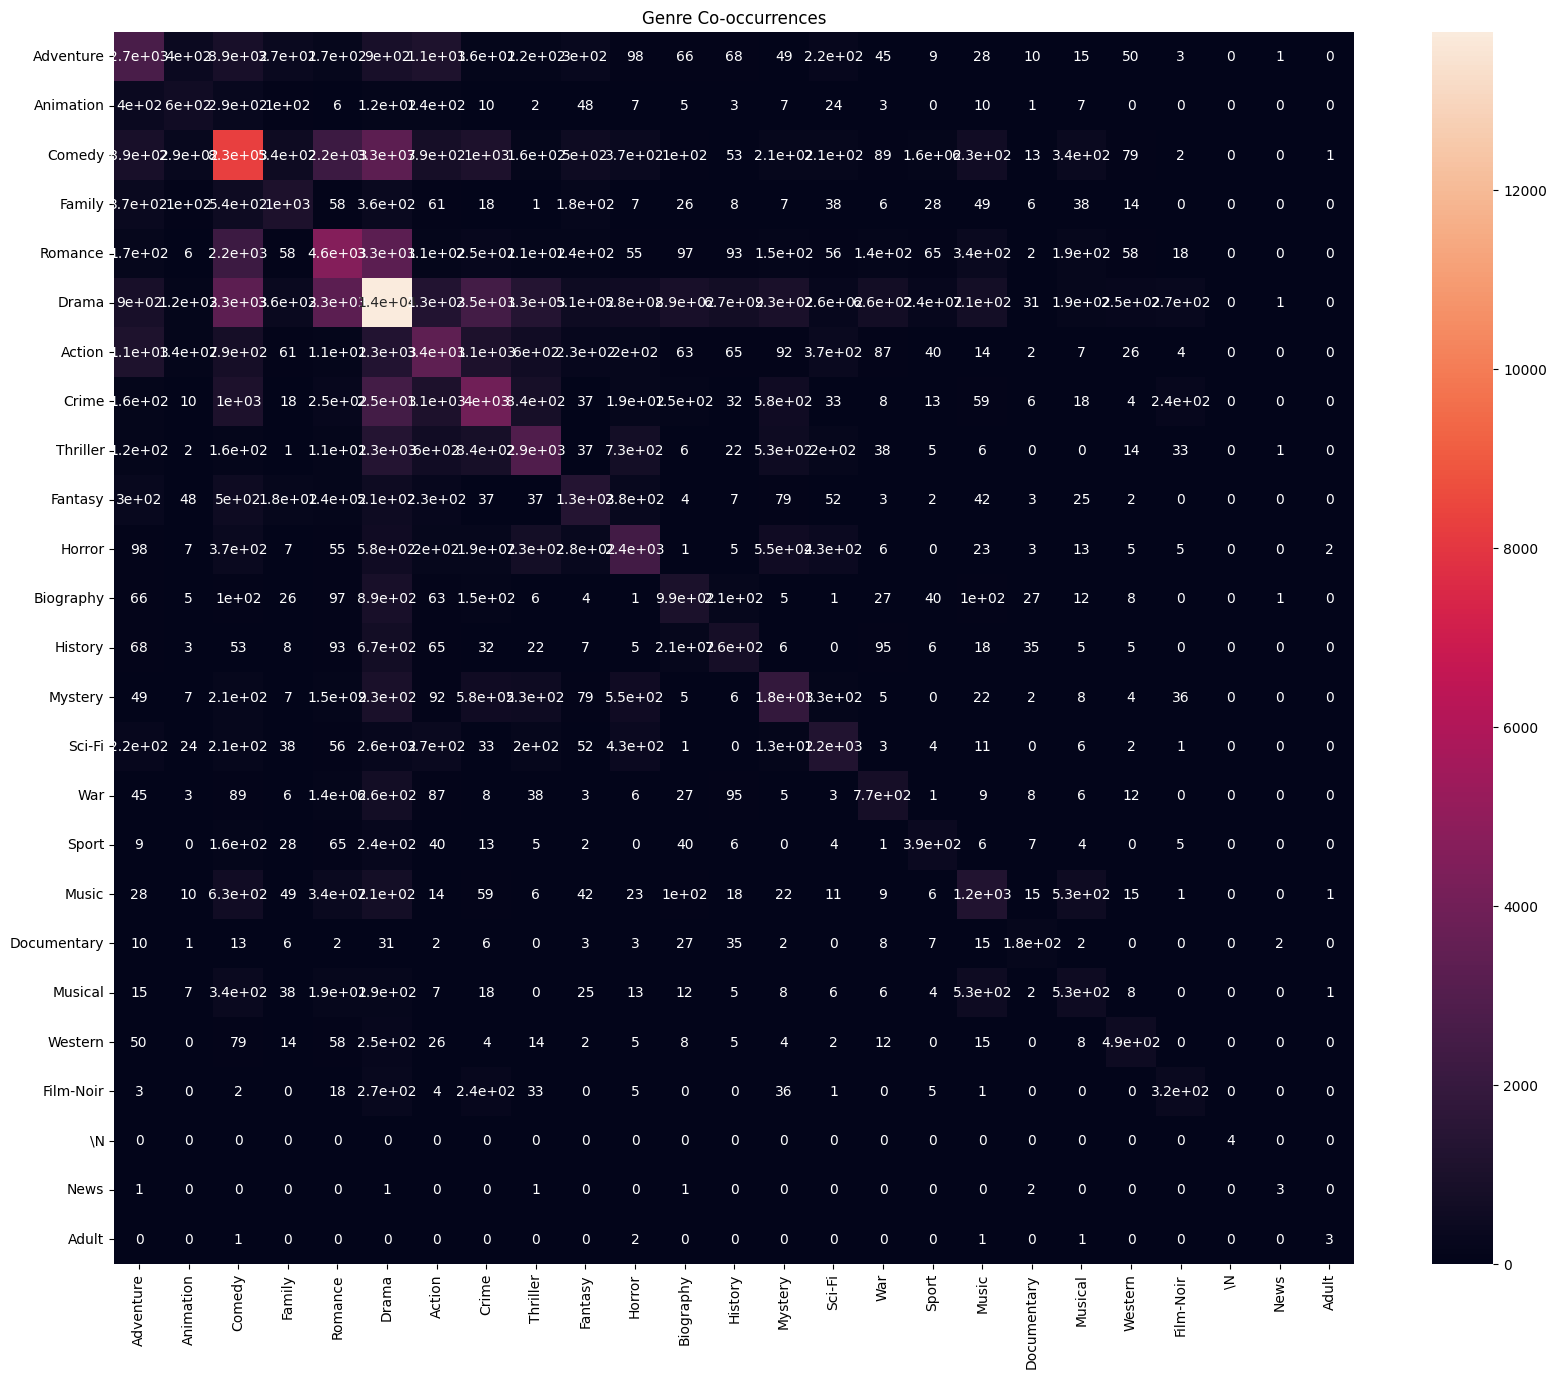

In [ ]:
cooccurrence = df_movieB[genre_columns].T.dot(df_movieB[genre_columns])
plt.figure(figsize=(20,16))
sns.heatmap(cooccurrence, annot=True)
plt.title('Genre Co-occurrences')

In [ ]:
#Bar Plot of Genre Frequencies

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Romance'),
  Text(3, 0, 'Crime'),
  Text(4, 0, 'Action'),
  Text(5, 0, 'Thriller'),
  Text(6, 0, 'Adventure'),
  Text(7, 0, 'Horror'),
  Text(8, 0, 'Mystery'),
  Text(9, 0, 'Fantasy'),
  Text(10, 0, 'Music'),
  Text(11, 0, 'Sci-Fi'),
  Text(12, 0, 'Family'),
  Text(13, 0, 'Biography'),
  Text(14, 0, 'War'),
  Text(15, 0, 'History'),
  Text(16, 0, 'Animation'),
  Text(17, 0, 'Musical'),
  Text(18, 0, 'Western'),
  Text(19, 0, 'Sport'),
  Text(20, 0, 'Film-Noir'),
  Text(21, 0, 'Documentary'),
  Text(22, 0, '\\N'),
  Text(23, 0, 'News'),
  Text(24, 0, 'Adult')])

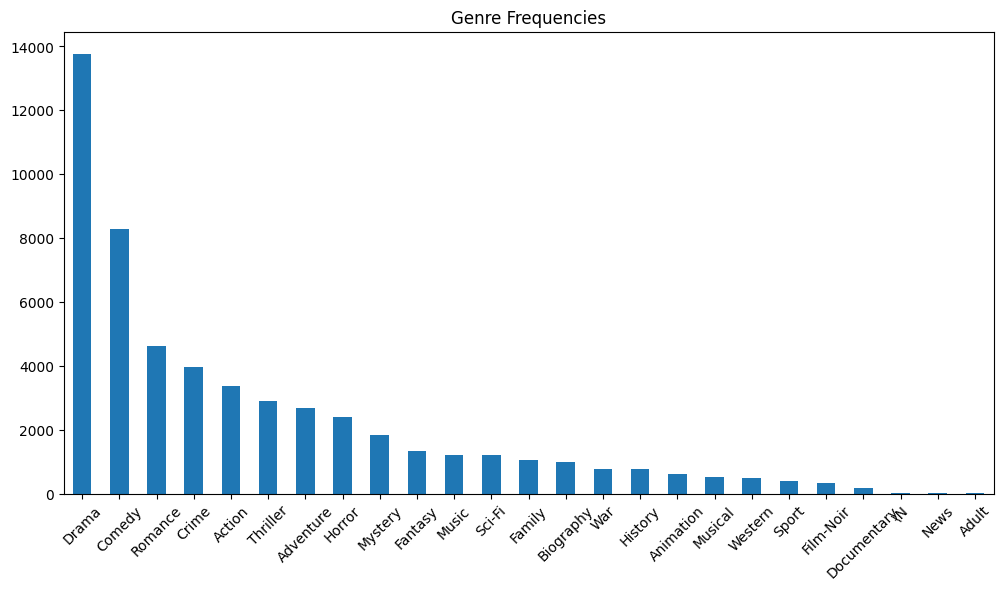

In [18]:
genre_counts = df_movieB[genre_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
genre_counts.plot(kind='bar')
plt.title('Genre Frequencies')
plt.xticks(rotation=45)

In [ ]:
###PCA

In [19]:
#explore genre_columns via PCA
data = df_movieB[genre_columns]

In [20]:
data

Adventure  Animation  Comedy  Family  Romance  Drama  Action  Crime  \
0              1          1       1       0        0      0       0      0   
1              1          0       1       1        0      0       0      0   
2              0          0       1       0        1      0       0      0   
3              0          0       1       0        1      1       0      0   
4              0          0       1       1        1      0       0      0   
...          ...        ...     ...     ...      ...    ...     ...    ...   
22640          0          0       1       0        0      0       0      0   
22641          0          0       1       0        0      0       0      0   
22642          1          0       1       0        0      0       1      0   
22643          0          0       0       0        0      1       0      0   
22644          0          0       0       0        0      0       0      0   

       Thriller  Fantasy  ...  War  Sport  Music  Documentary  Musical  \
0             0        0  ...    0      0      0            0        0   
1             0        0  ...    0      0      0            0        0   
2             0        0  ...    0      0      0            0        0   
3             0        0  ...    0      0      0            0        0   
4             0        0  ...    0      0      0            0        0   
...         ...      ...  ...  ...    ...    ...          ...      ...   
22640         0        0  ...    0      0      0            0        0   
22641         0        0  ...    0      0      0            0        0   
22642         0        0  ...    0      0      0            0        0   
22643         0        0  ...    0      0      1            0        0   
22644         0        1  ...    0      0      0            0        0   

       Western  Film-Noir  \N  News  Adult  
0            0          0   0     0      0  
1            0          0   0     0      0  
2            0          0   0     0      0  
3            0          0   0     0      0  
4            0          0   0     0      0  
...        ...        ...  ..   ...    ...  
22640        0          0   0     0      0  
22641        0          0   0     0      0  
22642        0          0   0     0      0  
22643        0          0   0     0      0  
22644        0          0   0     0      0  

[22645 rows x 25 columns]

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)
genres_pca = pca.fit_transform(df_movieB[genre_columns])

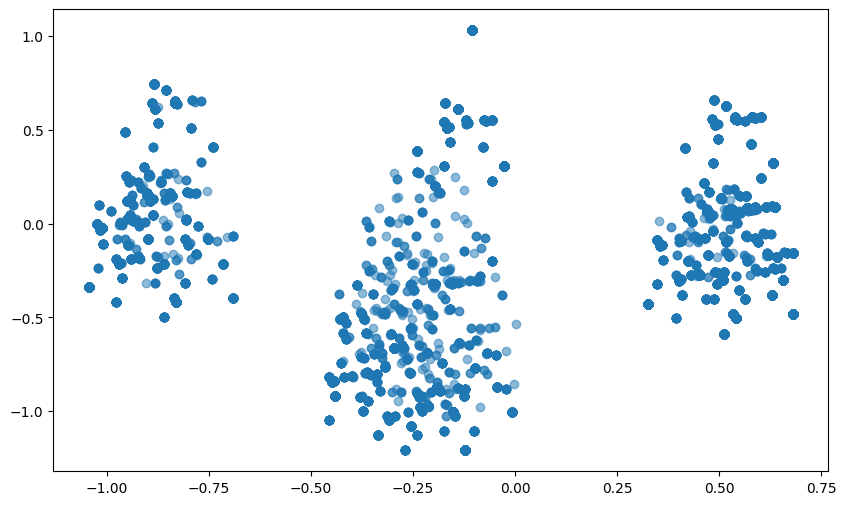

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(genres_pca[:,0], genres_pca[:,1], alpha=0.5)

In [ ]:
#TO WHAT CORRESPOND THE 3 CLUSTERS IN THE PREVIOUS FIGURE?? HOW TO FIND OUT??


In [ ]:
pca

PCA(n_components=2)

In [ ]:
pca.components_

array([[-1.23132700e-01, -4.35183700e-02, -6.45003313e-01,
        -5.64979260e-02,  1.22707777e-02,  7.25898428e-01,
        -7.74579338e-02,  9.12724160e-02,  6.26362135e-02,
        -4.91591014e-02, -5.51909191e-02,  6.17603429e-02,
         4.74030019e-02,  3.85188977e-02, -4.18671998e-02,
         4.11400075e-02, -1.21790136e-03, -2.29653170e-02,
        -2.93214033e-03, -2.95554785e-02,  3.51627512e-03,
         2.26690516e-02, -1.09059951e-04,  1.71297506e-05,
        -1.92574020e-04],
       [-1.55129344e-01, -2.35971338e-02,  4.74079794e-01,
        -8.38792856e-04,  4.89869367e-01,  3.88126193e-01,
        -3.38418197e-01, -2.33696003e-01, -3.15104527e-01,
        -3.23127549e-02, -2.34104458e-01,  1.22429245e-02,
         8.05623216e-03, -1.32526201e-01, -1.06854982e-01,
         1.36663643e-02,  1.03185111e-02,  6.99759125e-02,
        -7.47242211e-03,  3.39187148e-02, -3.25848577e-03,
        -1.13278989e-02, -2.16105183e-04, -1.76301438e-04,
        -1.43608758e-04]])

In [ ]:
original_labels = data.columns

In [ ]:
original_labels

Index(['Adventure', 'Animation', 'Comedy', 'Family', 'Romance', 'Drama',
       'Action', 'Crime', 'Thriller', 'Fantasy', 'Horror', 'Biography',
       'History', 'Mystery', 'Sci-Fi', 'War', 'Sport', 'Music', 'Documentary',
       'Musical', 'Western', 'Film-Noir', '\N', 'News', 'Adult'],
      dtype='object')

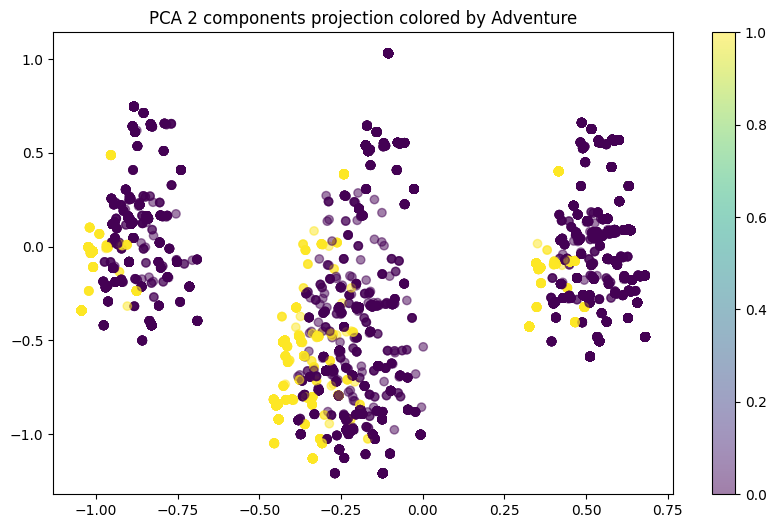

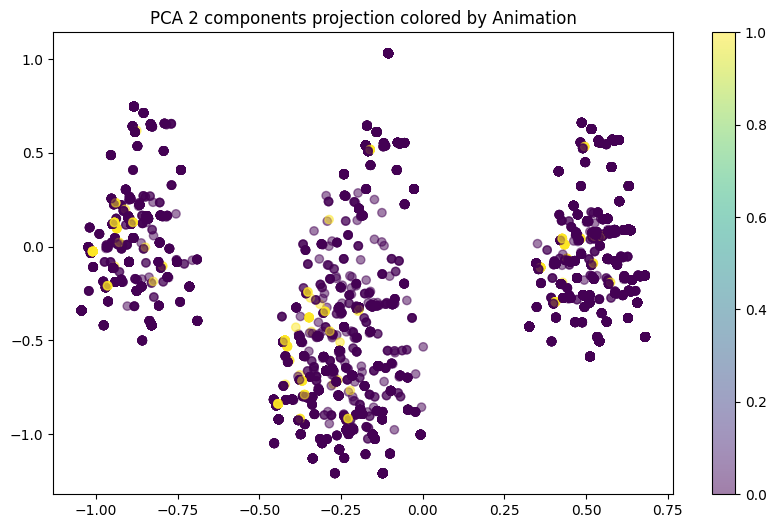

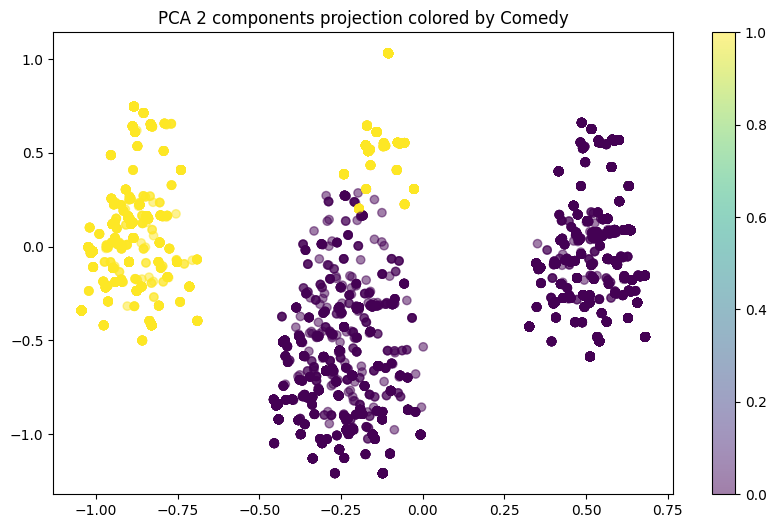

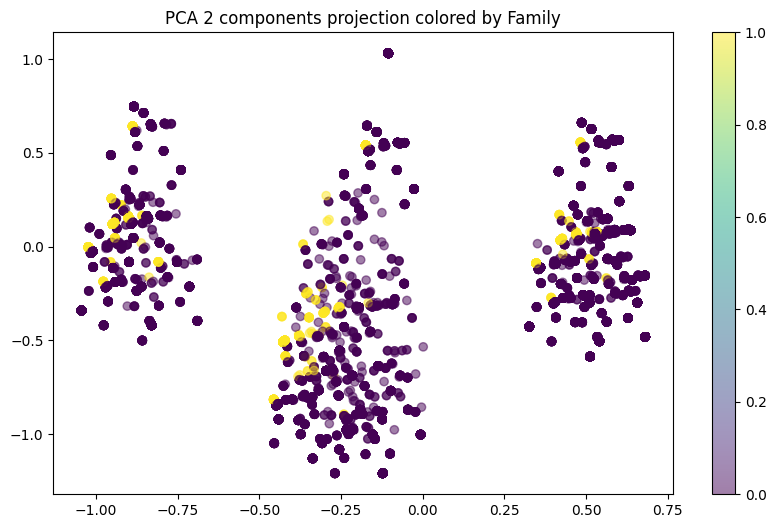

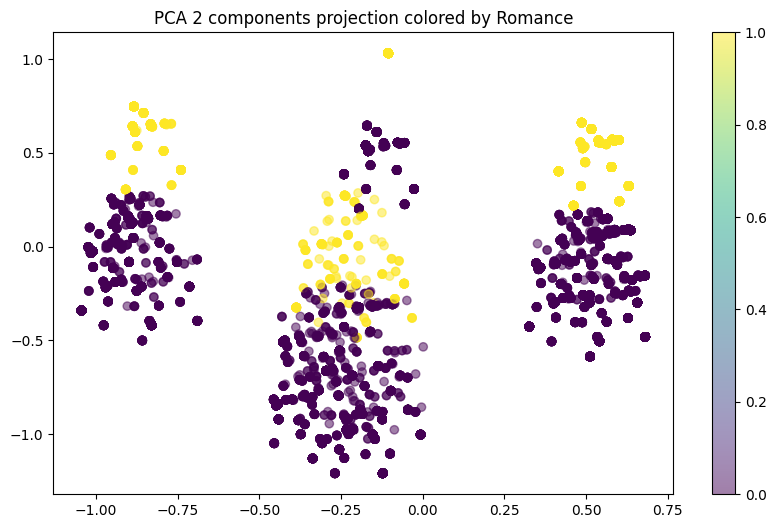

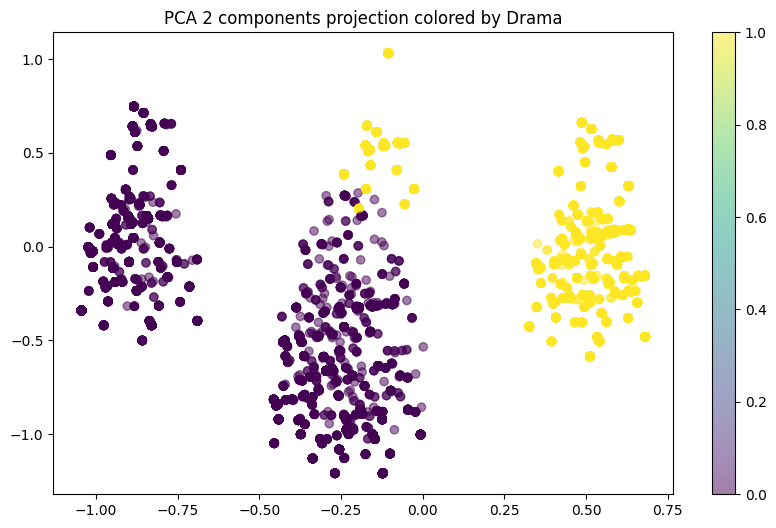

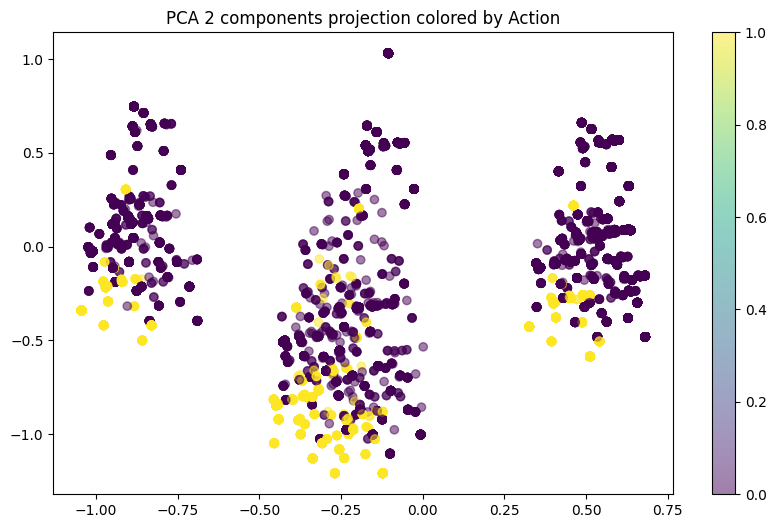

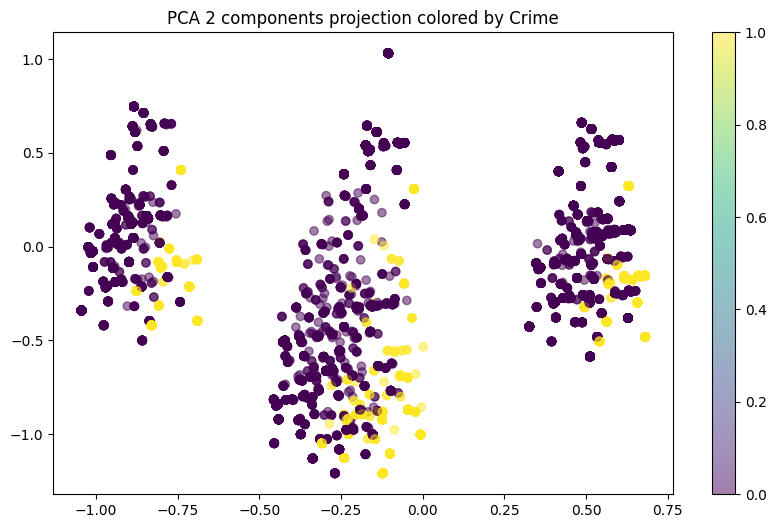

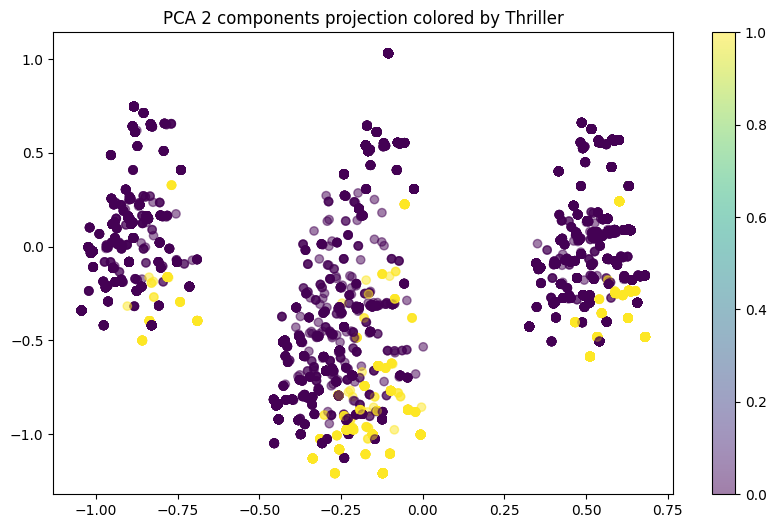

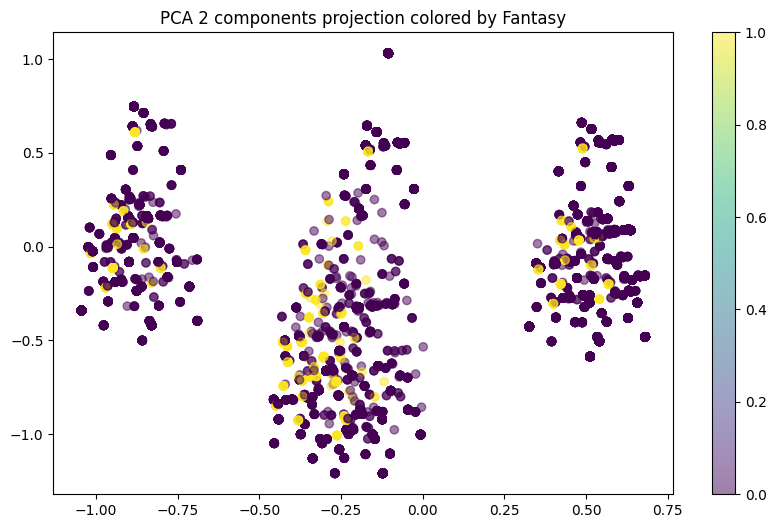

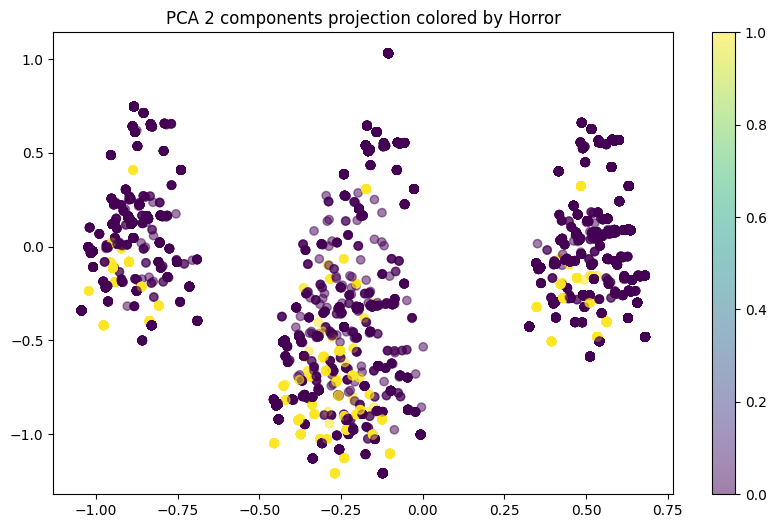

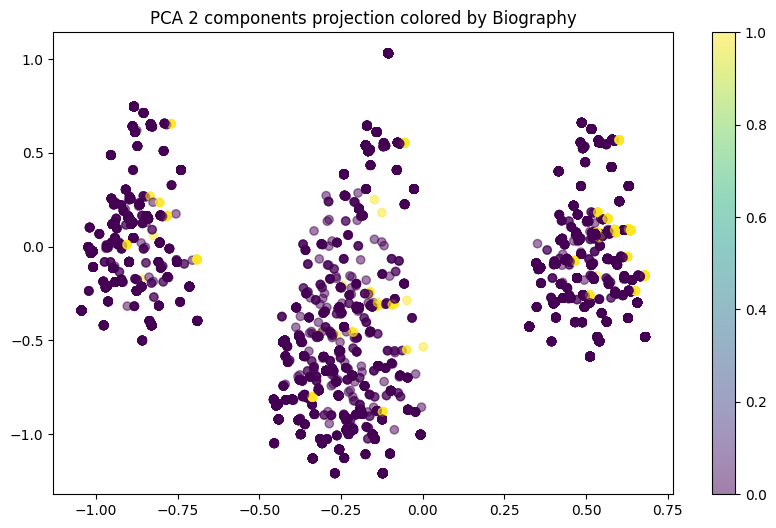

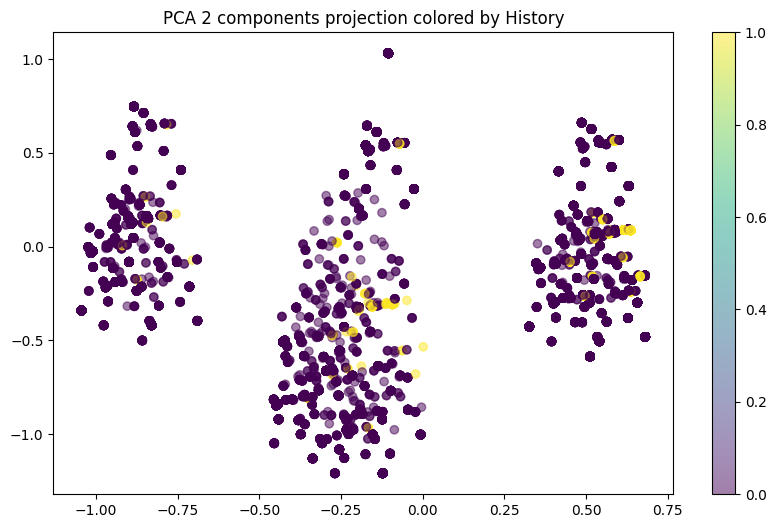

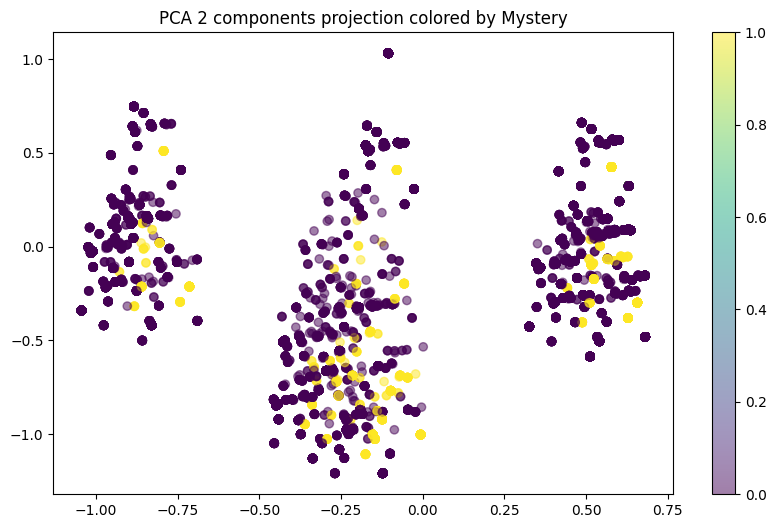

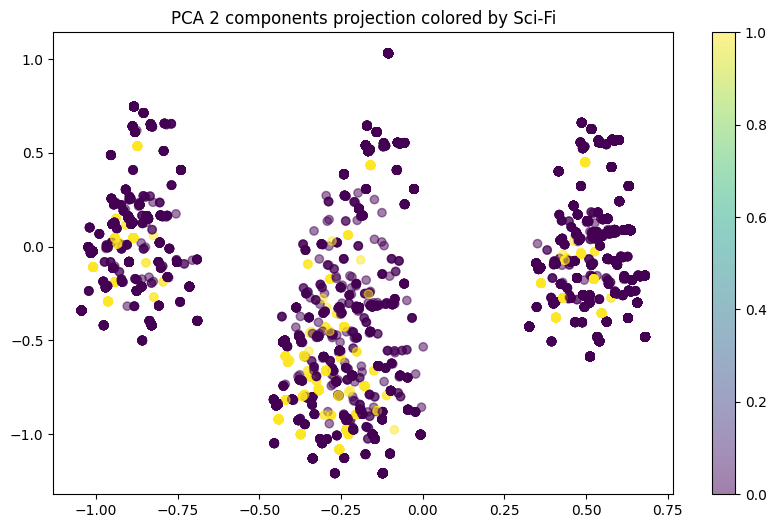

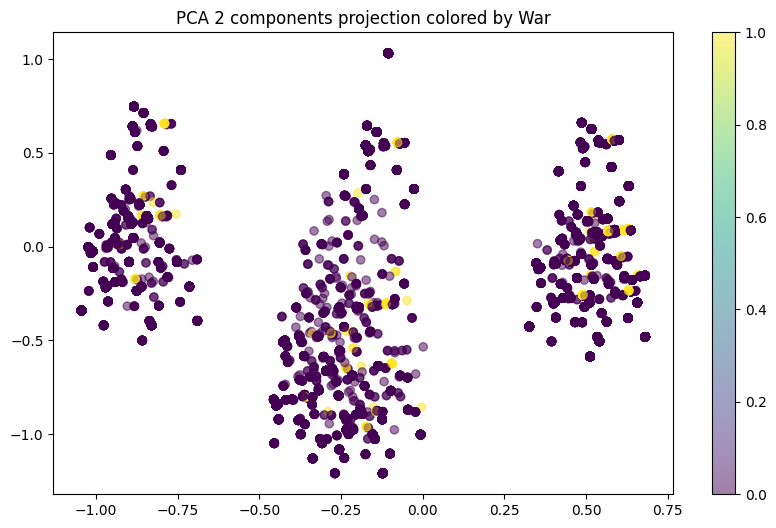

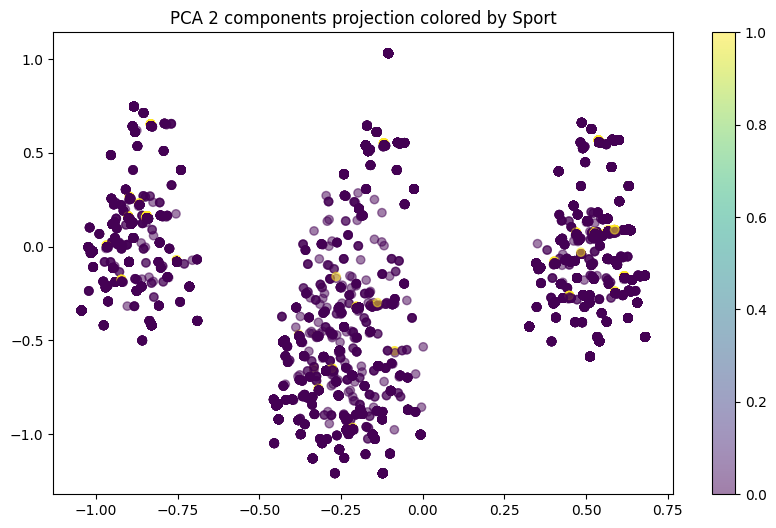

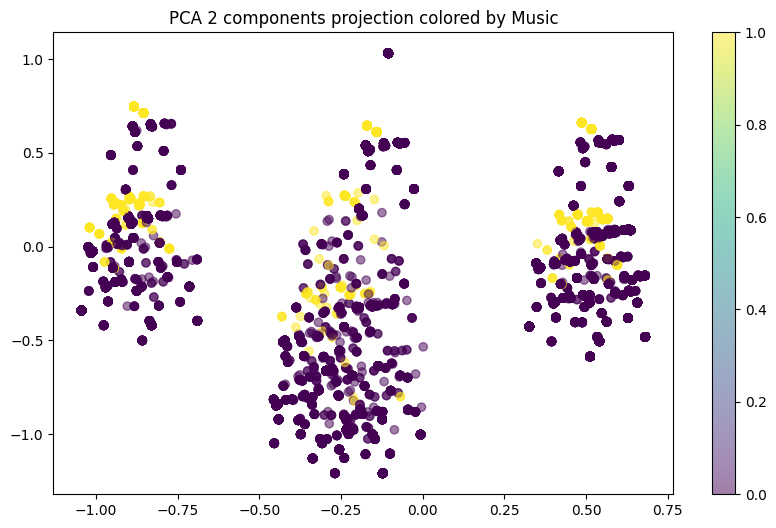

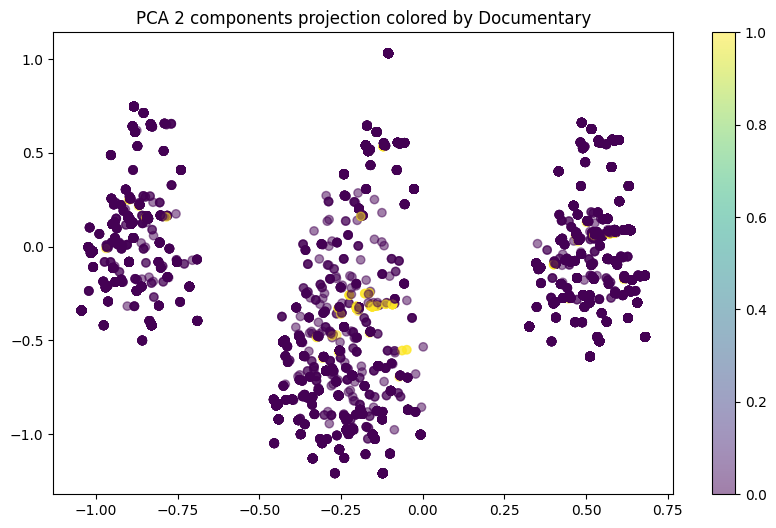

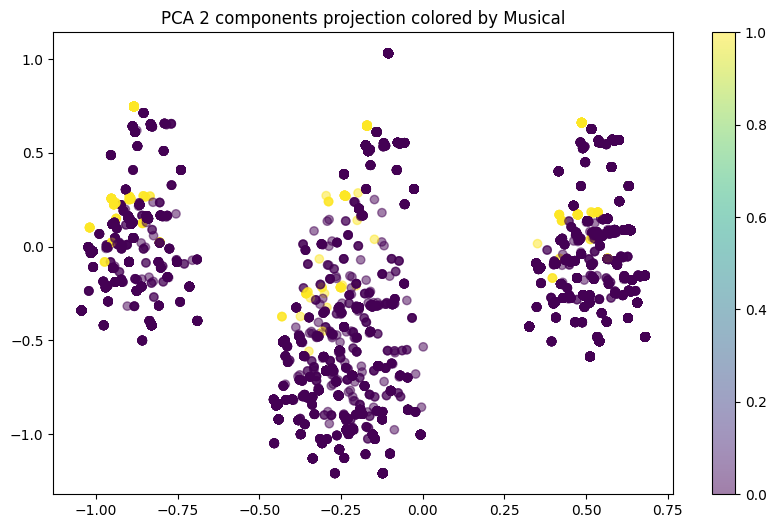

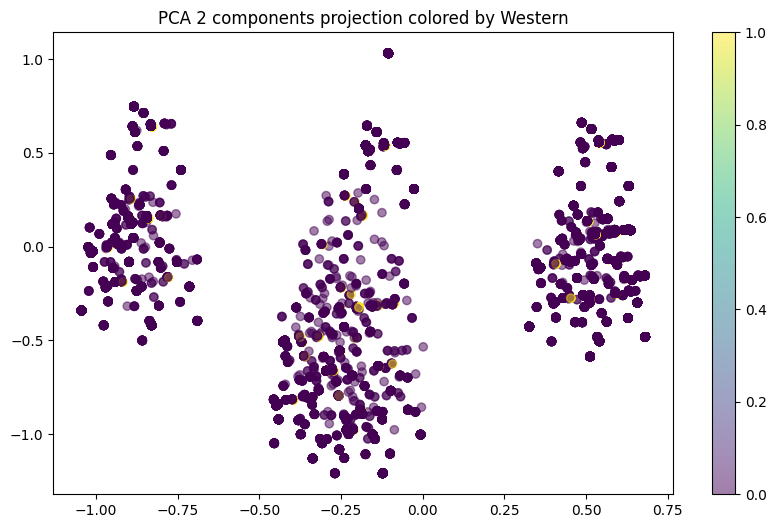

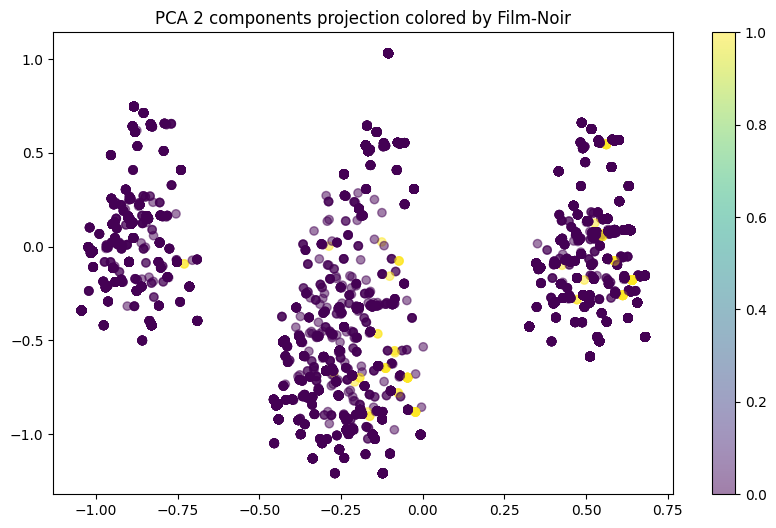

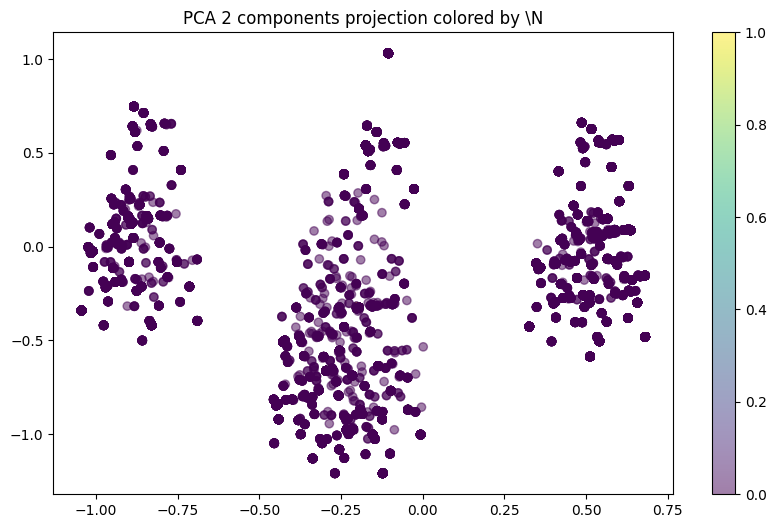

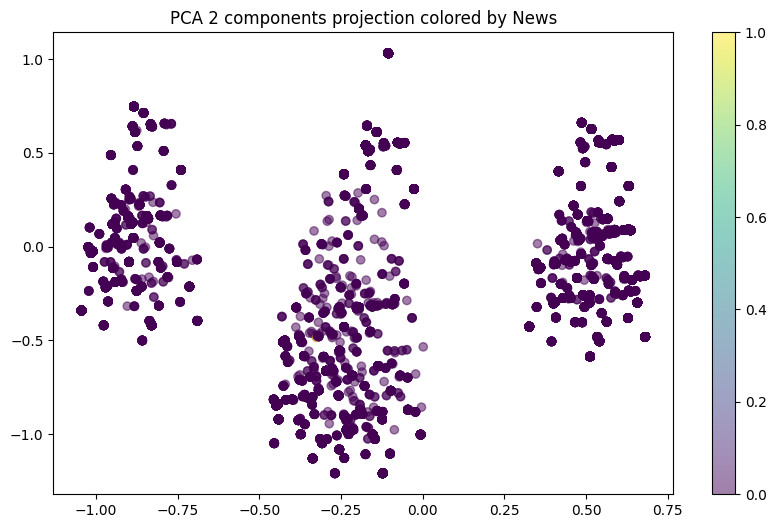

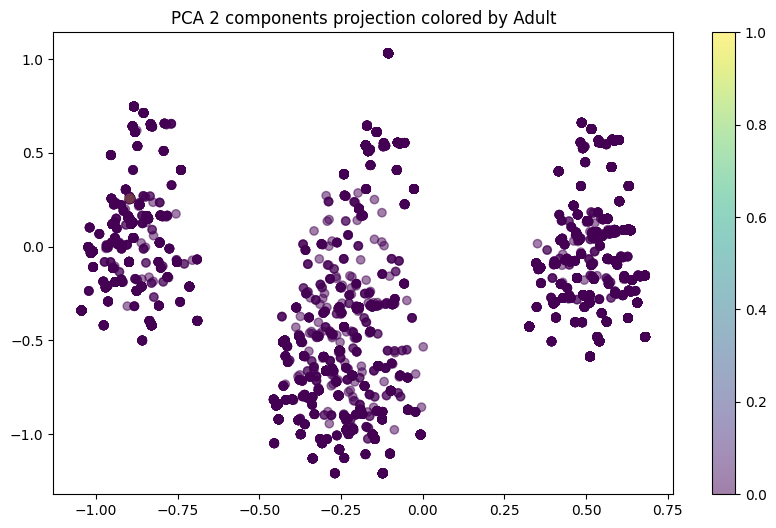

In [ ]:
for genre in genre_columns:
    plt.figure(figsize=(10,6))
    scatter = plt.scatter(genres_pca[:,0], genres_pca[:,1], 
                         c=df_movieB[genre], 
                         cmap='viridis',
                         alpha=0.5)
    plt.colorbar(scatter)
    plt.title(f'PCA 2 components projection colored by {genre}')
    plt.show()

In [ ]:
# What Do colour variations signify in next figure? Relative Independence wrt averageRating?

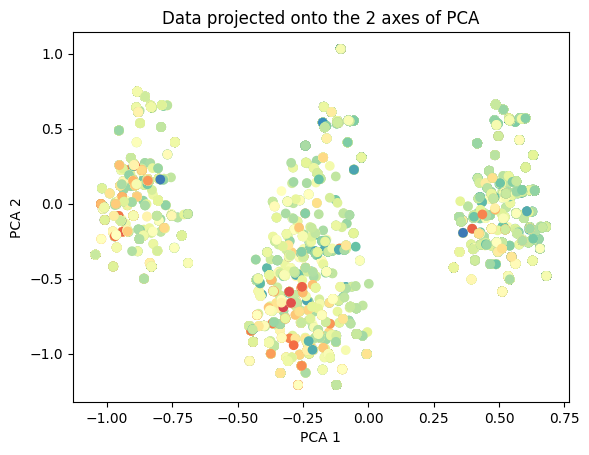

The explained variance ratio is 0.34


In [26]:
pca2 = PCA(n_components = 2)
data_2D = pca2.fit_transform(data)


fig = plt.figure()

ax = fig.add_subplot(111)
#ax.scatter(data_2D[:, 0], data_2D[:, 1], c = target, cmap=plt.cm.Spectral)
ax.scatter(data_2D[:, 0], data_2D[:, 1], c = df_movieB['averageRating'], cmap=plt.cm.Spectral)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

ax.set_title("Data projected onto the 2 axes of PCA")
plt.show();

print("The explained variance ratio is", round(pca2.explained_variance_ratio_.sum(),2))

In [ ]:
labels2 = [f'Axis {i+1}' for i in range(2)]


In [ ]:
df_pca_2components = pd.DataFrame(pca2.components_, columns=data.columns, index=labels2)

In [ ]:
df_pca_2components

Adventure  Animation    Comedy    Family   Romance     Drama  \
Axis 1  -0.123133  -0.043518 -0.645003 -0.056498  0.012271  0.725898   
Axis 2  -0.155129  -0.023597  0.474080 -0.000839  0.489869  0.388126   

          Action     Crime  Thriller   Fantasy  ...       War     Sport  \
Axis 1 -0.077458  0.091272  0.062636 -0.049159  ...  0.041140 -0.001218   
Axis 2 -0.338418 -0.233696 -0.315105 -0.032313  ...  0.013666  0.010319   

           Music  Documentary   Musical   Western  Film-Noir        \N  \
Axis 1 -0.022965    -0.002932 -0.029555  0.003516   0.022669 -0.000109   
Axis 2  0.069976    -0.007472  0.033919 -0.003258  -0.011328 -0.000216   

            News     Adult  
Axis 1  0.000017 -0.000193  
Axis 2 -0.000176 -0.000144  

[2 rows x 25 columns]

In [24]:
def draw_correlation_circle2(pca, features_names, pc1=2, pc2=3, zoom_factor=1.0):
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Draw the circle with adjusted radius
    circle = plt.Circle((0,0), zoom_factor, fill=False)
    ax.add_artist(circle)
    
    # Plot arrows - using PC3 and PC4 (index 2 and 3)
    for i, (x, y) in enumerate(pca.components_[pc1:pc2+1].T):
        plt.arrow(0, 0, x, y, color='b', alpha=0.5)
        plt.text(x*1.15, y*1.15, features_names[i], 
                color='g',
                ha='center', va='center')
    
    # Set limits and labels
    plt.axis('equal')
    plt.axvline(x=0, color='grey', linestyle='--')
    plt.axhline(y=0, color='grey', linestyle='--')
    plt.xlabel(f'PC{pc1+1} ({pca.explained_variance_ratio_[pc1]:.1%})')
    plt.ylabel(f'PC{pc2+1} ({pca.explained_variance_ratio_[pc2]:.1%})')
    plt.title(f'Correlation Circle (PC{pc1+1} vs PC{pc2+1})')
    
    # Adjust axis limits based on zoom
    limit = 1.2 * zoom_factor
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)


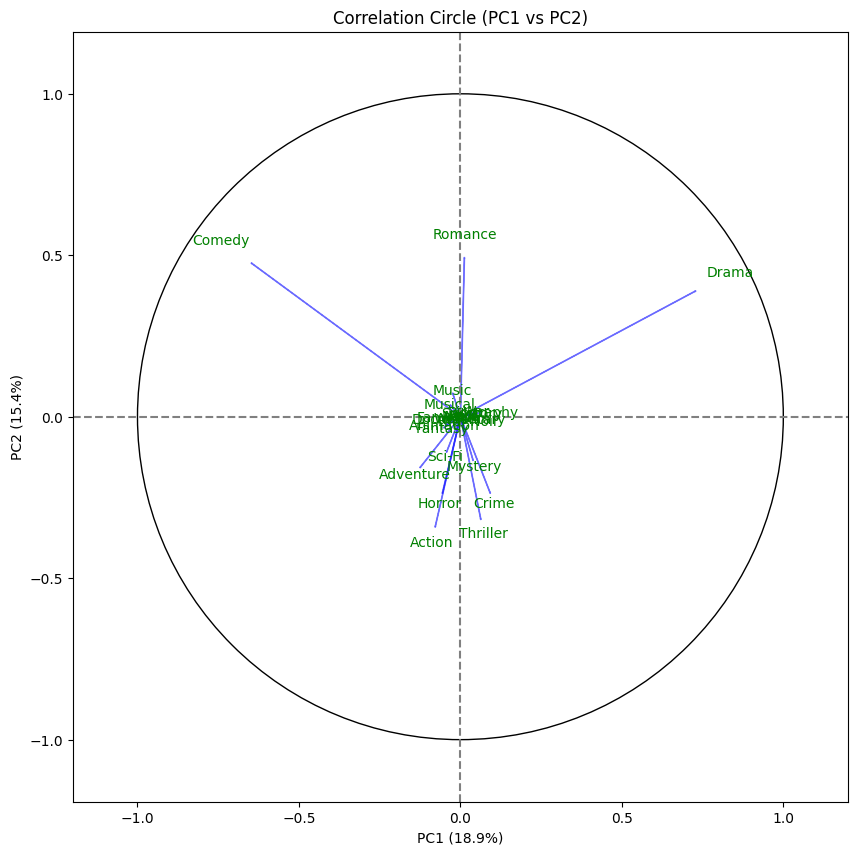

In [27]:
draw_correlation_circle2(pca2, genre_columns, pc1=0, pc2=1)

In [28]:
explained_variance = pca2.explained_variance_ratio_

In [ ]:
explained_variance

array([0.18896284, 0.154239  ])

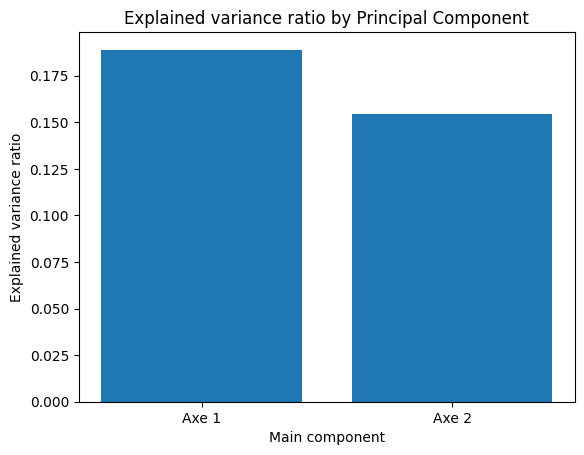

In [ ]:
plt.bar(range(len(explained_variance)), explained_variance)
plt.xticks([0, 1], ['Axe 1', 'Axe 2'])
plt.xlabel('Main component')
plt.ylabel('Explained variance ratio')
plt.title('Explained variance ratio by Principal Component')
plt.show()

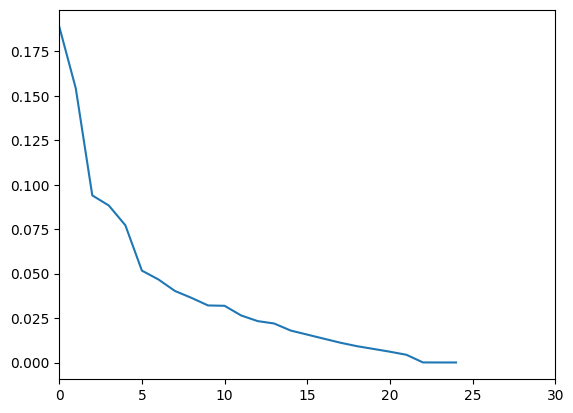

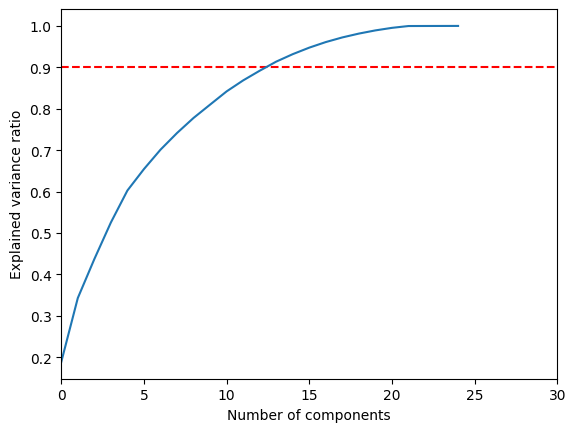

In [ ]:
pca = PCA()
pca.fit(data)

plt.figure()
plt.xlim(0, 30)
plt.plot(pca.explained_variance_ratio_);

plt.figure()
plt.xlim(0, 30)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.axhline(y = 0.9, color = 'r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum());

In [ ]:
pca = PCA(n_components = 0.9)
pca.fit(data)
print("Number of components retained:", pca.n_components_)

Number of components retained: 14


In [ ]:
#OUT OF 25 genres, with PCA analysis we get the information that 90% of the explained variance is provided via 14 components

In [ ]:
explained_variance = pca.explained_variance_ratio_

In [ ]:
explained_variance

array([0.18896284, 0.154239  , 0.09400277, 0.08831874, 0.07721953,
       0.05172114, 0.04674993, 0.04027272, 0.03640053, 0.03213821,
       0.03193834, 0.02652329, 0.0233389 , 0.02199126])

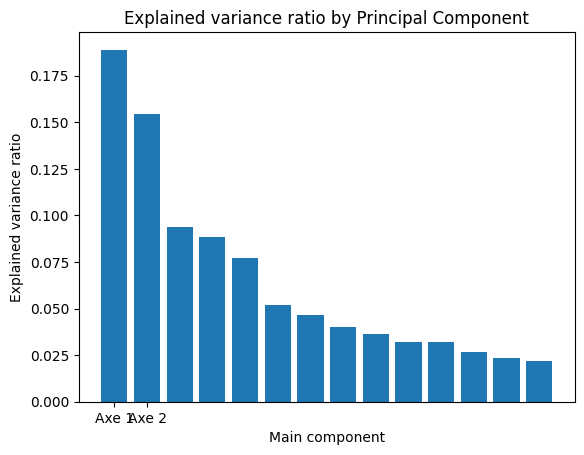

In [ ]:
plt.bar(range(len(explained_variance)), explained_variance)
plt.xticks([0, 1], ['Axe 1', 'Axe 2'])
plt.xlabel('Main component')
plt.ylabel('Explained variance ratio')
plt.title('Explained variance ratio by Principal Component')
plt.show()

<BarContainer object of 14 artists>

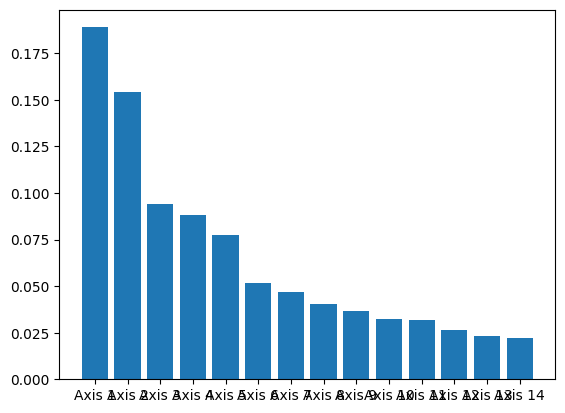

In [ ]:
n_components = len(explained_variance)  # PCA components number

# Create list of positions
positions = range(n_components)

# Create list of labels dynamically
labels = [f'Axis {i+1}' for i in range(n_components)]

# Set the ticks
plt.xticks(positions, labels)

# Original bar plot remains the same
plt.bar(range(len(explained_variance)), explained_variance)


In [ ]:
pca_components = pca.components_

In [ ]:
df_pca_components = pd.DataFrame(pca_components, columns=data.columns, index=labels)

In [ ]:
display(df_pca_components)

Adventure  Animation    Comedy    Family   Romance     Drama  \
Axis 1   -0.123133  -0.043518 -0.645003 -0.056498  0.012271  0.725898   
Axis 2   -0.155129  -0.023597  0.474080 -0.000839  0.489869  0.388126   
Axis 3   -0.013111  -0.004928  0.341994 -0.017033 -0.310188  0.218990   
Axis 4    0.573971   0.097121 -0.131616  0.092929 -0.052335  0.111187   
Axis 5    0.017159  -0.024374 -0.210793 -0.091795  0.786560 -0.223046   
Axis 6   -0.173025  -0.046239  0.232903 -0.095598 -0.061954  0.173493   
Axis 7    0.565738   0.128638 -0.035281  0.195999  0.049511 -0.060722   
Axis 8   -0.247413  -0.010647 -0.252972  0.092744 -0.086314 -0.278553   
Axis 9   -0.059343  -0.008973  0.019923 -0.079295 -0.047107 -0.007937   
Axis 10  -0.376659  -0.032206 -0.111076  0.239823 -0.031845 -0.169142   
Axis 11   0.116075  -0.024986  0.071604  0.046211  0.052897  0.186634   
Axis 12  -0.075395  -0.010814 -0.029340  0.236117 -0.026920  0.063116   
Axis 13  -0.139002   0.063363 -0.096178  0.494911 -0.033872 -0.042017   
Axis 14  -0.036818  -0.037505  0.079423  0.694652  0.093496  0.113664   

           Action     Crime  Thriller   Fantasy  ...       War     Sport  \
Axis 1  -0.077458  0.091272  0.062636 -0.049159  ...  0.041140 -0.001218   
Axis 2  -0.338418 -0.233696 -0.315105 -0.032313  ...  0.013666  0.010319   
Axis 3   0.260755  0.692899 -0.128192 -0.075897  ... -0.021888 -0.000462   
Axis 4   0.452540 -0.375198 -0.348603  0.075709  ...  0.040303  0.007537   
Axis 5   0.363107  0.318048  0.104850 -0.072661  ... -0.024793 -0.014616   
Axis 6   0.321994 -0.341069  0.725243 -0.148487  ...  0.023246  0.006674   
Axis 7  -0.504311  0.110412  0.400129 -0.035771  ... -0.031171 -0.014325   
Axis 8  -0.137333  0.020672 -0.014618 -0.037637  ...  0.047989  0.023384   
Axis 9   0.197812 -0.203364 -0.058607 -0.203039  ... -0.001082 -0.000376   
Axis 10  0.031145 -0.115387 -0.025371  0.568694  ...  0.081295  0.035862   
Axis 11  0.124289  0.066901  0.128173  0.642637  ... -0.135550 -0.048885   
Axis 12 -0.080266  0.029351  0.007100  0.065321  ... -0.064656 -0.011413   
Axis 13  0.077144 -0.050237 -0.121350 -0.384446  ...  0.203117  0.028477   
Axis 14  0.143419  0.025680  0.081628 -0.084296  ... -0.414524  0.019173   

            Music  Documentary   Musical   Western  Film-Noir        \N  \
Axis 1  -0.022965    -0.002932 -0.029555  0.003516   0.022669 -0.000109   
Axis 2   0.069976    -0.007472  0.033919 -0.003258  -0.011328 -0.000216   
Axis 3  -0.021477    -0.011069 -0.016866 -0.021649   0.038454 -0.000304   
Axis 4  -0.012737     0.002557 -0.011894  0.016202  -0.026449 -0.000001   
Axis 5  -0.037757    -0.006446 -0.001547 -0.014428   0.007986 -0.000053   
Axis 6  -0.027300    -0.017584 -0.018015 -0.016672  -0.047574 -0.000357   
Axis 7  -0.043514     0.002139 -0.016746  0.009191   0.020383  0.000029   
Axis 8   0.573226     0.048122  0.308889  0.063048   0.015451  0.000872   
Axis 9   0.331889     0.001339  0.179629  0.000612  -0.026953 -0.000019   
Axis 10 -0.371702     0.030381 -0.195937  0.049392  -0.001100  0.000736   
Axis 11  0.408325    -0.043770  0.232250 -0.075788  -0.010754 -0.000855   
Axis 12  0.040932    -0.027004  0.038992  0.005303   0.030343 -0.000012   
Axis 13 -0.035773     0.006013  0.009077  0.096458   0.020044  0.000582   
Axis 14  0.025539    -0.028821  0.001979 -0.136395  -0.041150 -0.000991   

             News     Adult  
Axis 1   0.000017 -0.000193  
Axis 2  -0.000176 -0.000144  
Axis 3  -0.000209 -0.000352  
Axis 4   0.000111 -0.000205  
Axis 5  -0.000100 -0.000217  
Axis 6   0.000052 -0.000357  
Axis 7   0.000513 -0.000438  
Axis 8   0.000508  0.000659  
Axis 9  -0.000107 -0.000077  
Axis 10  0.000175 -0.000672  
Axis 11 -0.000562  0.000313  
Axis 12 -0.000540 -0.000416  
Axis 13 -0.000418  0.000576  
Axis 14 -0.000077 -0.000255  

[14 rows x 25 columns]

In [ ]:
# Create the correlation circle: from original DATASCIENTEST function had to change Axe into Axis ...
def draw_correlation_circleDATASCIENTEST(df_charges_factorielles, pca, arrow_length=0.1, label_rotation=0):
    fig, ax = plt.subplots(figsize=(20, 20))
    for i, var in enumerate(df_charges_factorielles.columns):
        x = df_charges_factorielles.loc['Axis 1', var]
        y = df_charges_factorielles.loc['Axis 2', var]
        ax.arrow(0, 0, x, y, head_width=arrow_length, head_length=arrow_length, fc='gray', ec='gray')
        ax.text(x*1.15, y*1.15, var, ha='center', va='center', rotation=label_rotation, fontsize=9)
    circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='black')
    ax.add_artist(circle)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('Axis 1 (PC1)')
    ax.set_ylabel('Axis 2 (PC2)')
    ax.set_title('Correlation circle')
    plt.grid()
    plt.show()


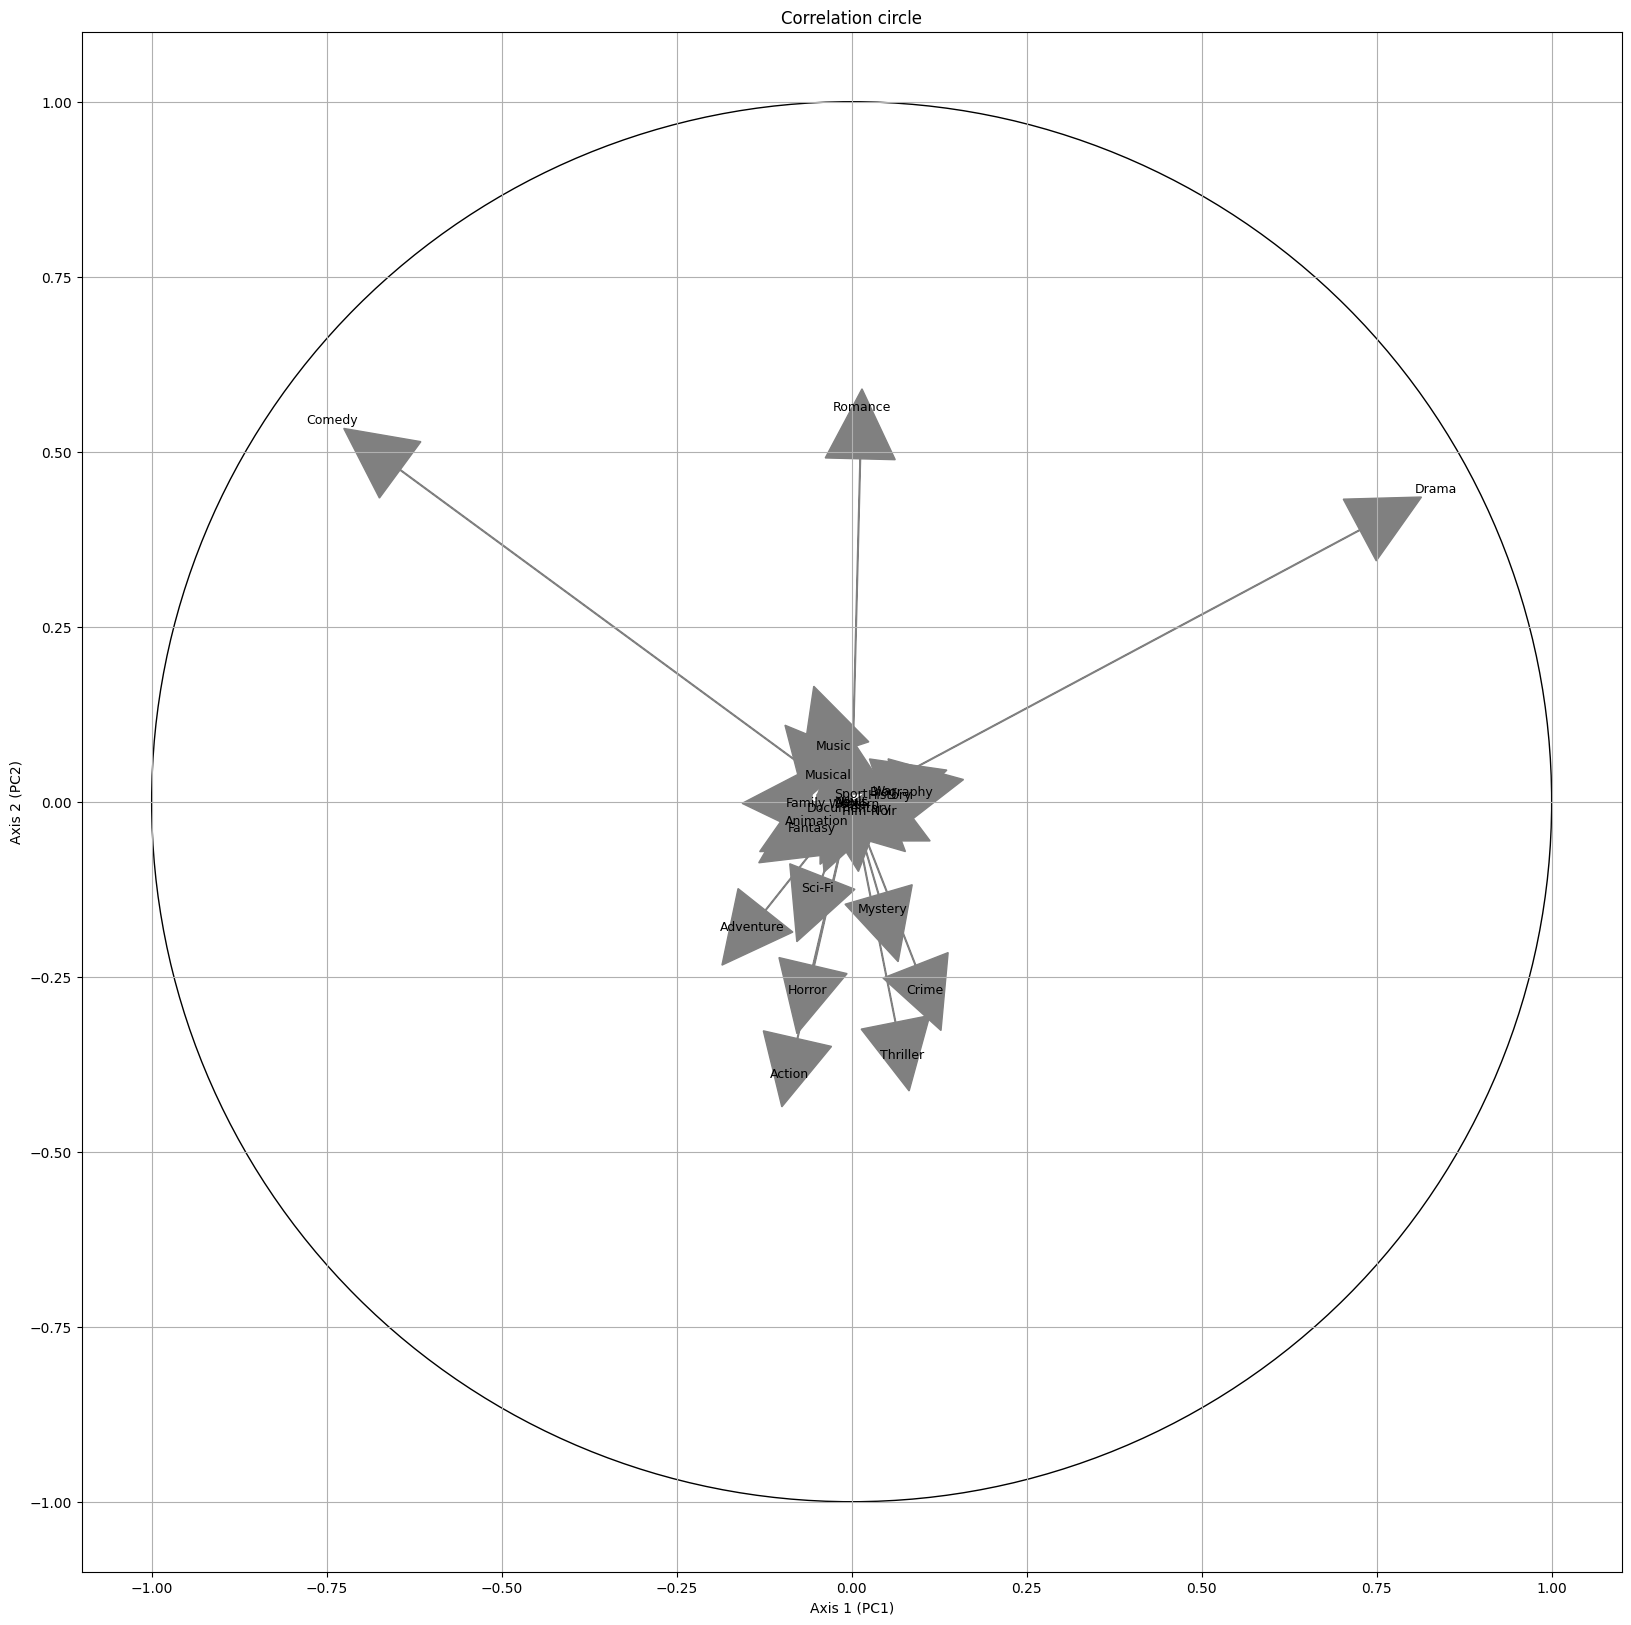

In [ ]:
draw_correlation_circleDATASCIENTEST(df_pca_components, pca)

In [ ]:
def draw_correlation_circle(pca, features_names):
    # Create figure
    fig, ax = plt.subplots(figsize=(20, 20))
    
    # Draw the circle
    circle = plt.Circle((0,0), 1, fill=False)
    ax.add_artist(circle)
    
    # Plot arrows
    for i, (x, y) in enumerate(pca.components_[:2].T):
        plt.arrow(0, 0, x, y, color='b', alpha=0.5)
        plt.text(x*1.15, y*1.15, features_names[i], color='g')
    
    # Set limits and labels
    plt.axis('equal')
    plt.axvline(x=0, color='grey', linestyle='--')
    plt.axhline(y=0, color='grey', linestyle='--')
    plt.xlabel(f'First component ({pca.explained_variance_ratio_[0]:.1%})')
    plt.ylabel(f'Second component ({pca.explained_variance_ratio_[1]:.1%})')
    plt.title('Correlation Circle')
    
    # Set axis limits
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)

In [ ]:
genre_columns

array(['Adventure', 'Animation', 'Comedy', 'Family', 'Romance', 'Drama',
       'Action', 'Crime', 'Thriller', 'Fantasy', 'Horror', 'Biography',
       'History', 'Mystery', 'Sci-Fi', 'War', 'Sport', 'Music',
       'Documentary', 'Musical', 'Western', 'Film-Noir', '\\N', 'News',
       'Adult'], dtype=object)

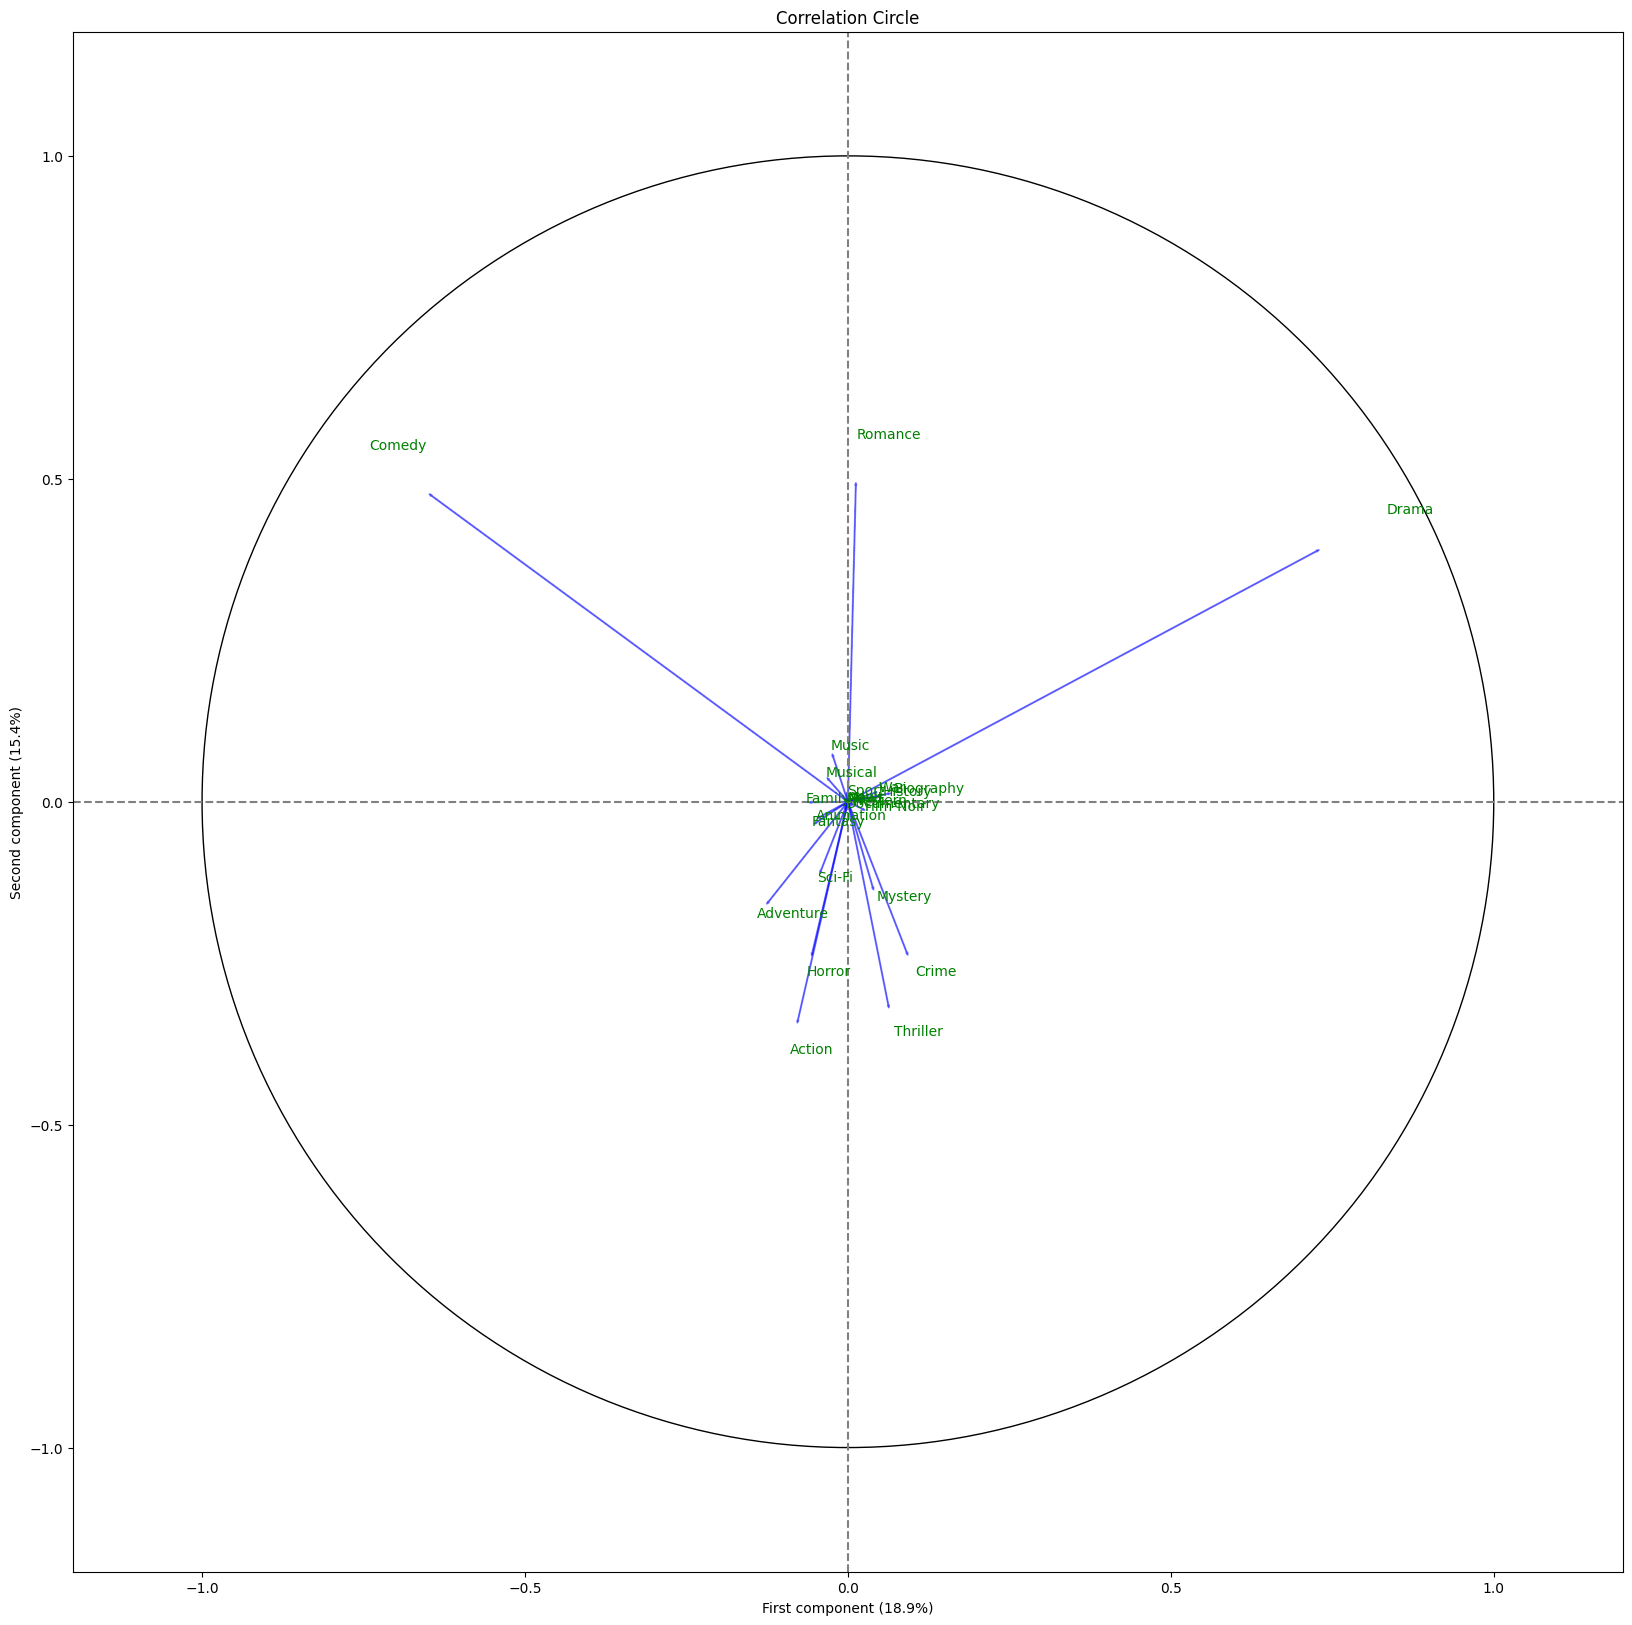

In [ ]:
draw_correlation_circle(pca, genre_columns)

In [ ]:
def draw_correlation_circleZoom(pca, features_names, zoom_factor=1.0):
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Draw the circle with adjusted radius
    circle = plt.Circle((0,0), zoom_factor, fill=False)
    ax.add_artist(circle)
    
    # Plot arrows
    for i, (x, y) in enumerate(pca.components_[:2].T):
        plt.arrow(0, 0, x, y, color='b', alpha=0.5)
        # Adjust text position
        plt.text(x*1.15, y*1.15, features_names[i], 
                color='g',
                ha='center', va='center')  # Center alignment
    
    # Set limits and labels
    plt.axis('equal')
    plt.axvline(x=0, color='grey', linestyle='--')
    plt.axhline(y=0, color='grey', linestyle='--')
    plt.xlabel(f'First component ({pca.explained_variance_ratio_[0]:.1%})')
    plt.ylabel(f'Second component ({pca.explained_variance_ratio_[1]:.1%})')
    plt.title('Correlation Circle')
    
    # Adjust axis limits based on zoom
    limit = 1.2 * zoom_factor
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)

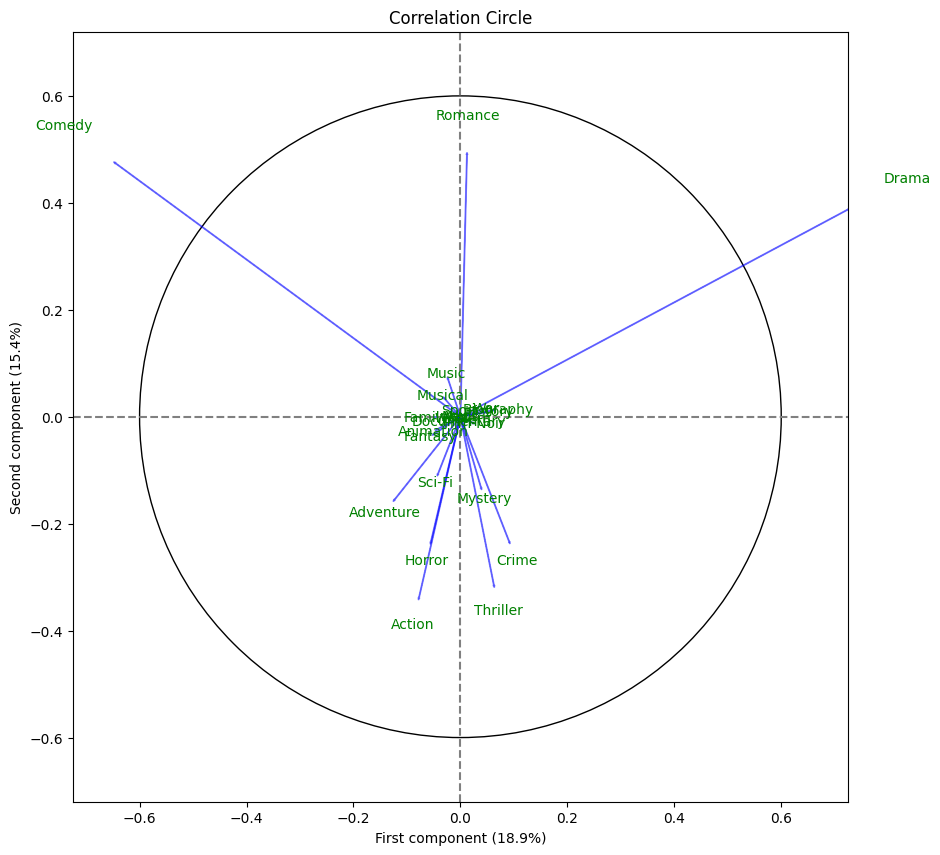

In [ ]:
draw_correlation_circleZoom(pca, genre_columns, zoom_factor=0.6)

In [ ]:
def draw_correlation_circleZoomPC3_4(pca, features_names, pc1=2, pc2=3, zoom_factor=1.0):
    # Create figure
        
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Draw the circle with adjusted radius
    circle = plt.Circle((0,0), zoom_factor, fill=False)
    ax.add_artist(circle)
    
    # Plot arrows - using PC3 and PC4 (index 2 and 3)
    for i, (x, y) in enumerate(pca.components_[pc1:pc2+1].T):
        plt.arrow(0, 0, x, y, color='b', alpha=0.5)
        plt.text(x*1.15, y*1.15, features_names[i], 
                color='g',
                ha='center', va='center')
    
    # Set limits and labels
    plt.axis('equal')
    plt.axvline(x=0, color='grey', linestyle='--')
    plt.axhline(y=0, color='grey', linestyle='--')
    plt.xlabel(f'PC{pc1+1} ({pca.explained_variance_ratio_[pc1]:.1%})')
    plt.ylabel(f'PC{pc2+1} ({pca.explained_variance_ratio_[pc2]:.1%})')
    plt.title(f'Correlation Circle (PC{pc1+1} vs PC{pc2+1})')
    
    # Adjust axis limits based on zoom
    limit = 1.2 * zoom_factor
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)



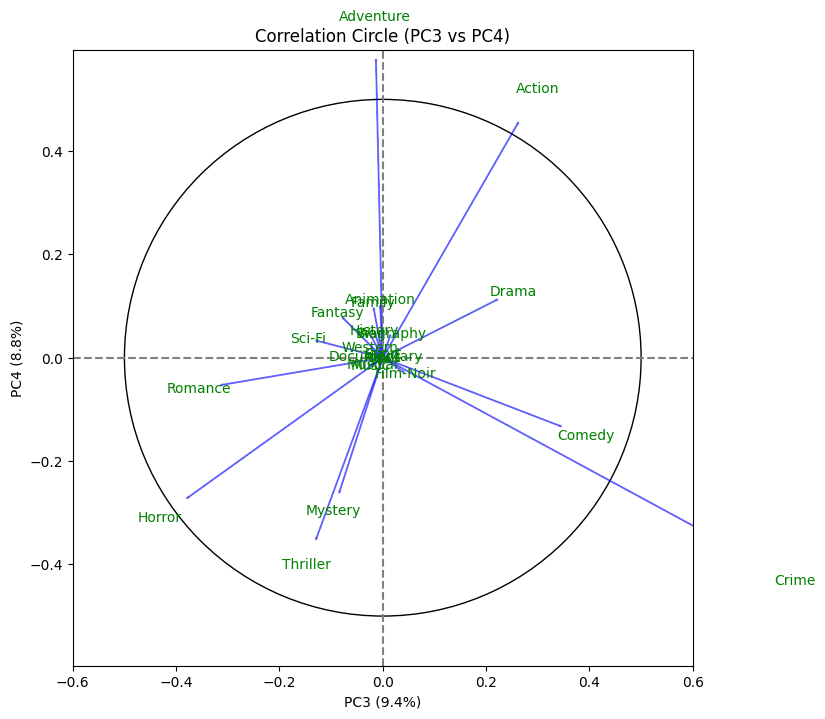

In [ ]:
draw_correlation_circleZoomPC3_4(pca, genre_columns, zoom_factor=0.5, pc1=2, pc2=3)

In [ ]:
def draw_correlation_circle(pca, features_names, pc1=0, pc2=1, zoom_factor=1.0, ax=None):
    # Use provided axis or create new one
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    
    # Draw the circle with adjusted radius
    circle = plt.Circle((0,0), zoom_factor, fill=False)
    ax.add_artist(circle)
    
    # Plot arrows
    for i, (x, y) in enumerate(pca.components_[pc1:pc2+1].T):
        ax.arrow(0, 0, x, y, color='b', alpha=0.5)
        ax.text(x*1.15, y*1.15, features_names[i], 
                color='g',
                ha='center', va='center')
    
    # Set limits and labels
    ax.set_aspect('equal')
    ax.axvline(x=0, color='grey', linestyle='--')
    ax.axhline(y=0, color='grey', linestyle='--')
    ax.set_xlabel(f'PC{pc1+1} ({pca.explained_variance_ratio_[pc1]:.1%})')
    ax.set_ylabel(f'PC{pc2+1} ({pca.explained_variance_ratio_[pc2]:.1%})')
    ax.set_title(f'Correlation Circle (PC{pc1+1} vs PC{pc2+1})')
    
    # Adjust axis limits based on zoom
    limit = 1.2 * zoom_factor
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)


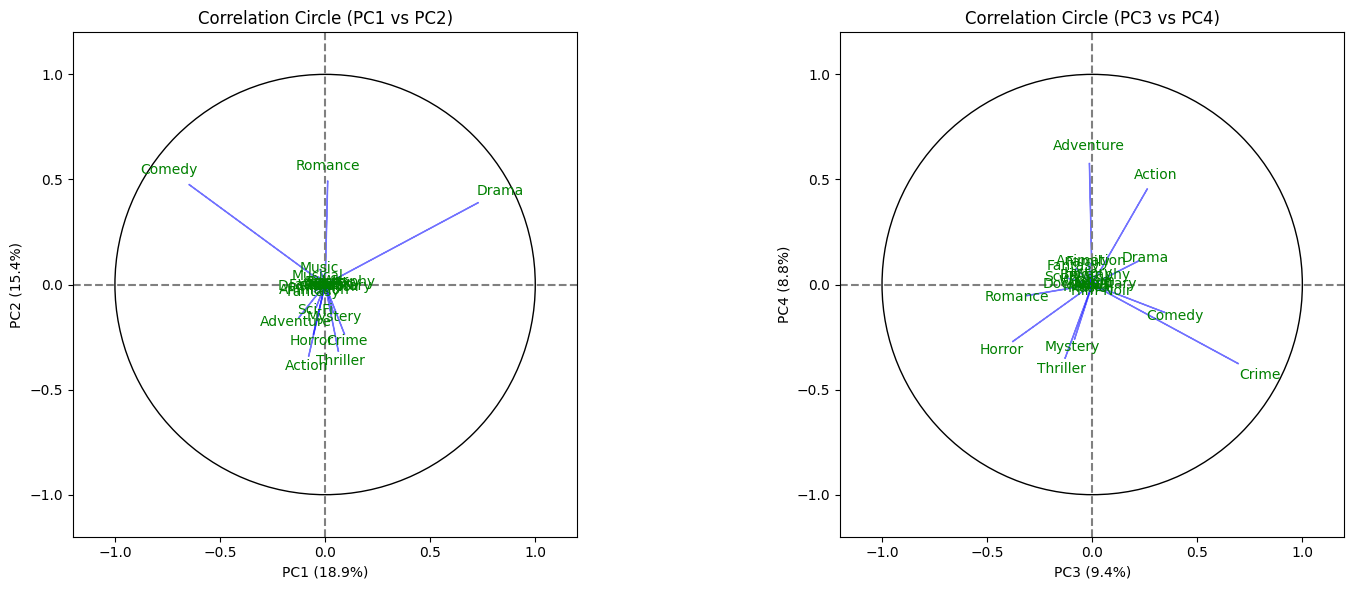

In [ ]:
# Now create the side-by-side plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Draw circles
draw_correlation_circle(pca, genre_columns, pc1=0, pc2=1, ax=ax1)
draw_correlation_circle(pca, genre_columns, pc1=2, pc2=3, ax=ax2)

plt.tight_layout()
plt.show()

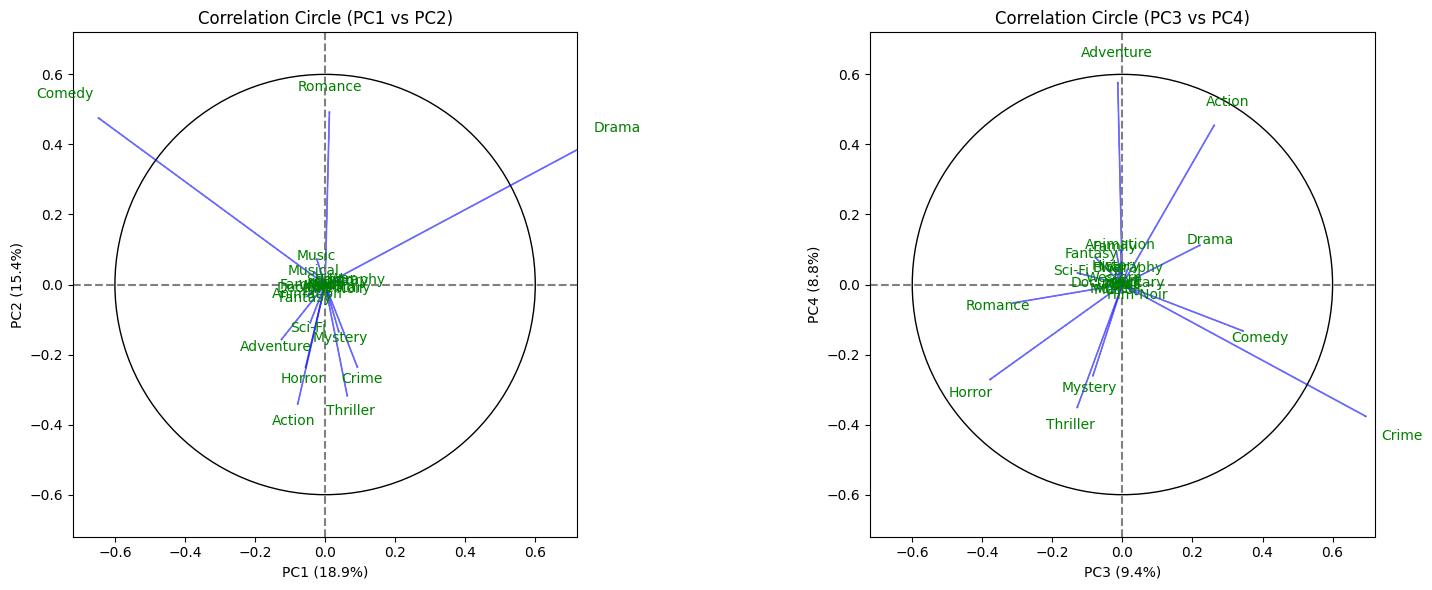

In [ ]:
# Now create the side-by-side plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Draw circles
draw_correlation_circle(pca, genre_columns, pc1=0, pc2=1, ax=ax1, zoom_factor=0.6)
draw_correlation_circle(pca, genre_columns, pc1=2, pc2=3, ax=ax2, zoom_factor=0.6)

plt.tight_layout()
plt.show()

In [ ]:
def plot_explained_variance(pca):
    # Get explained variance ratio
    variance_ratio = pca.explained_variance_ratio_
    
    # Create cumulative sum
    cumsum = np.cumsum(variance_ratio)
    
    # Create figure
    plt.figure(figsize=(10, 5))
    
    # Bar plot of individual explained variance
    plt.bar(range(len(variance_ratio)), variance_ratio)
    
    # Line plot of cumulative explained variance
    plt.plot(range(len(cumsum)), cumsum, 'r-o', label='Cumulative explained variance')
    
    # Customize plot
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Components')
    plt.legend()
    plt.grid(True)
    
    plt.show()

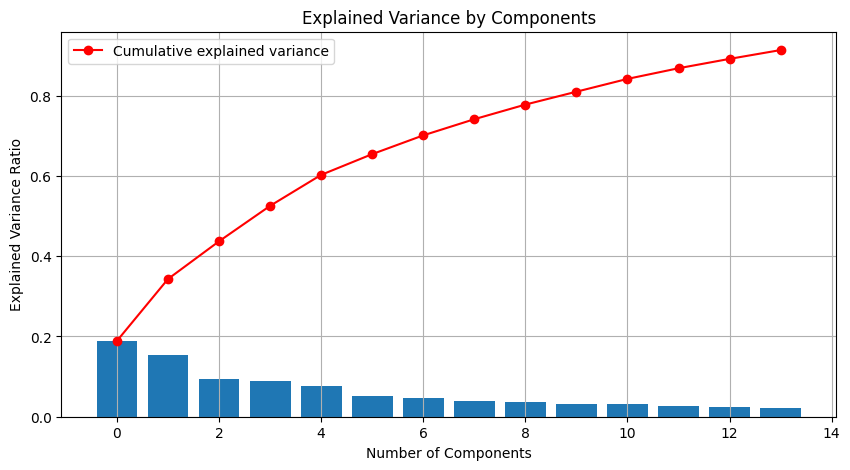

In [ ]:
plot_explained_variance(pca)

In [ ]:
def plot_variance_pie(pca):
    # Get explained variance ratio
    variance_ratio = pca.explained_variance_ratio_
    
    # Create labels for each component
    labels = [f'PC{i+1} ({var:.1%})' for i, var in enumerate(variance_ratio)]
    
    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(variance_ratio, 
            labels=labels,
            autopct='%1.1f%%',
            startangle=90)
    
    plt.title('Explained Variance Ratio by Principal Components')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    
    plt.show()

C:\Users\EFCA7255\AppData\Local\Temp\1\ipykernel_20280\3861220035.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 2000x1500 with 0 Axes>

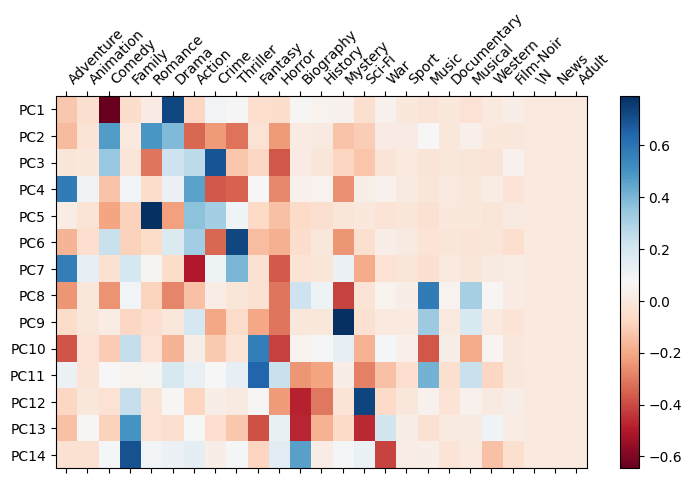

In [ ]:
plt.figure(figsize=(20, 15))
plt.matshow(pca.components_, cmap='RdBu', aspect='auto')
plt.colorbar()

# Add feature names
plt.xticks(range(len(genre_columns)), genre_columns, rotation=45, ha='left')
plt.yticks(range(len(pca.components_)), [f"PC{i+1}" for i in range(len(pca.components_))])

plt.tight_layout()
plt.show()

In [ ]:
###SUGGESTIONS
#either A/ keep first 14 axes provided by PCA, or B/ merge music and musical, eliminate \N, Sport, Documentary, News, Adult, keep rest
# a variant of B: C/ regroup remaining categories using as reference the correlation circle?? OK even though PC1 and PC2 axis account for only about 35% of explained variance?

In [ ]:
###UMAP

In [ ]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import umap

c:\Users\EFCA7255\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
reducer = umap.UMAP()
genres_umap = reducer.fit_transform(df_movieB[genre_columns])

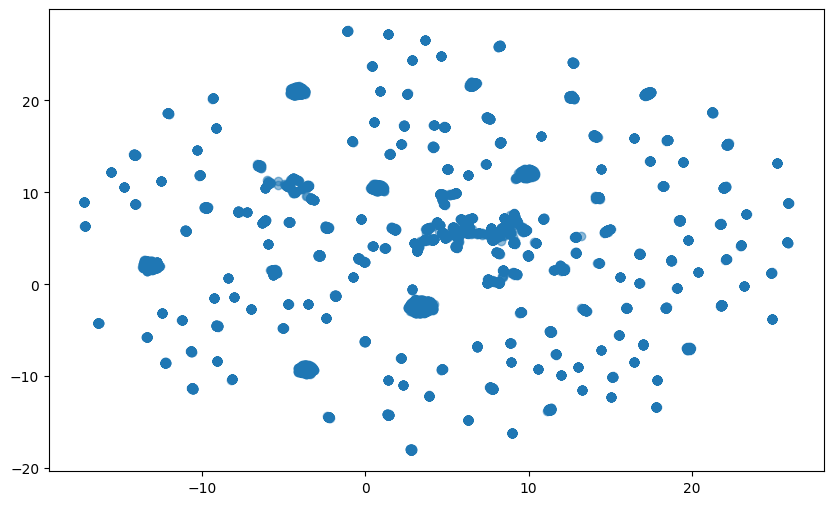

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(genres_umap[:,0], genres_umap[:,1], alpha=0.5)

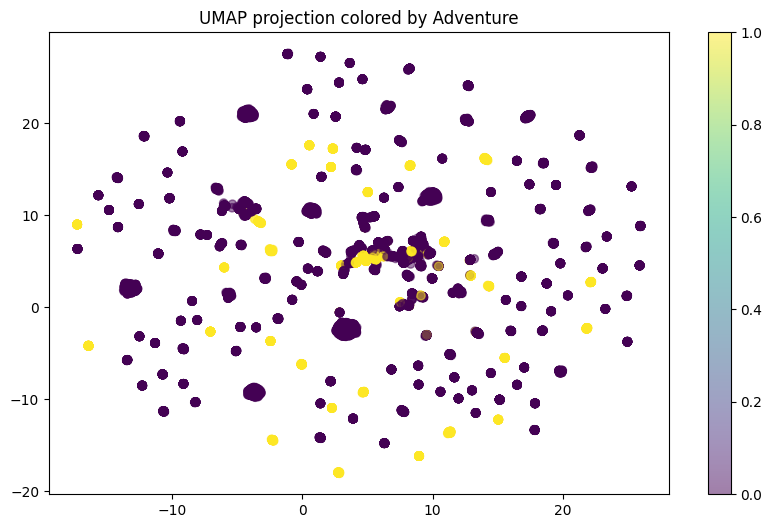

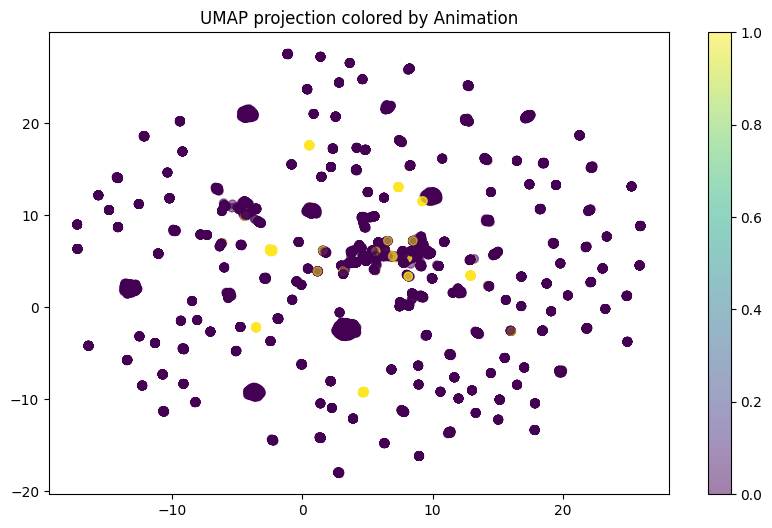

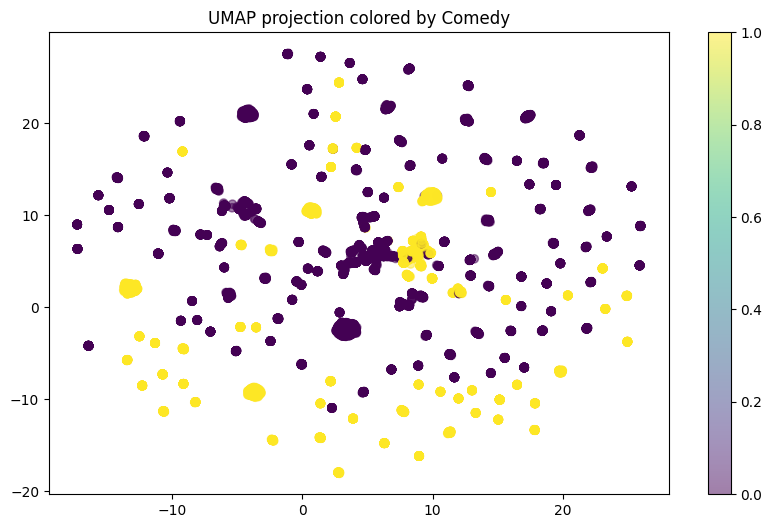

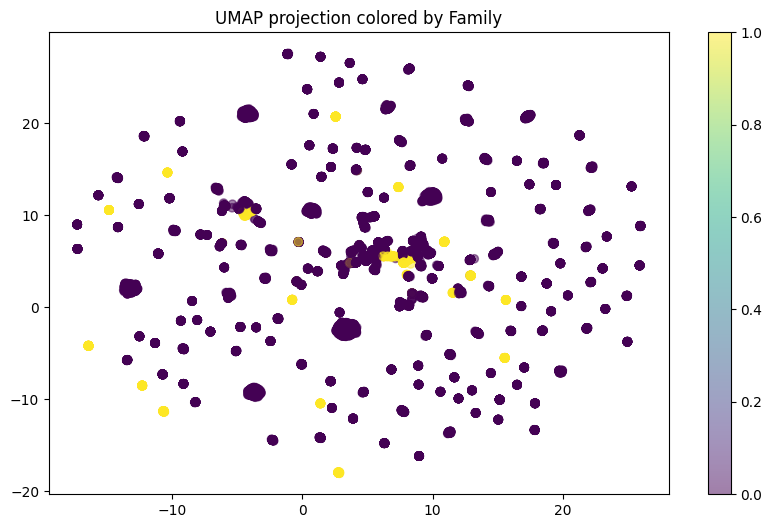

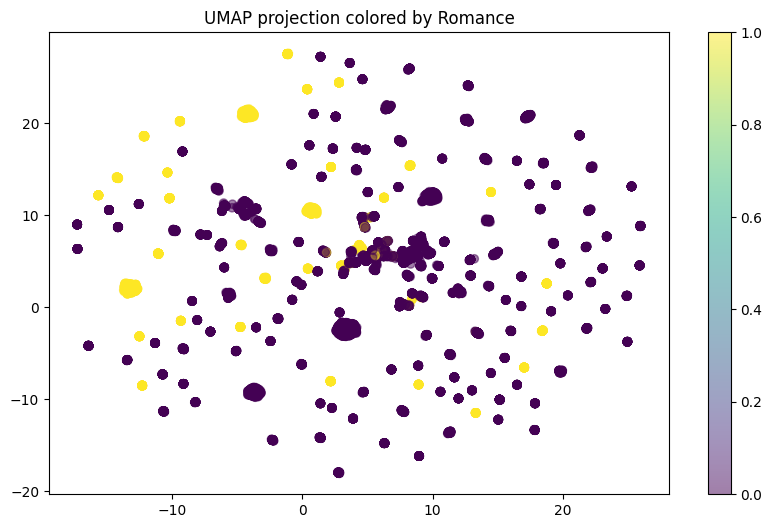

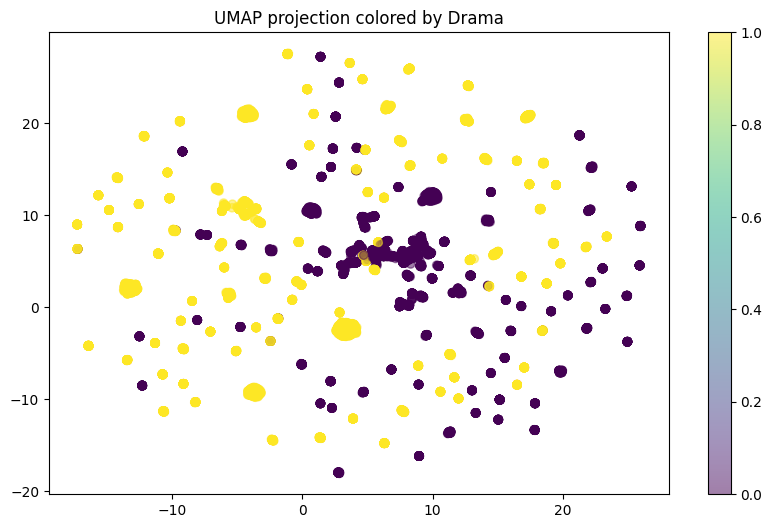

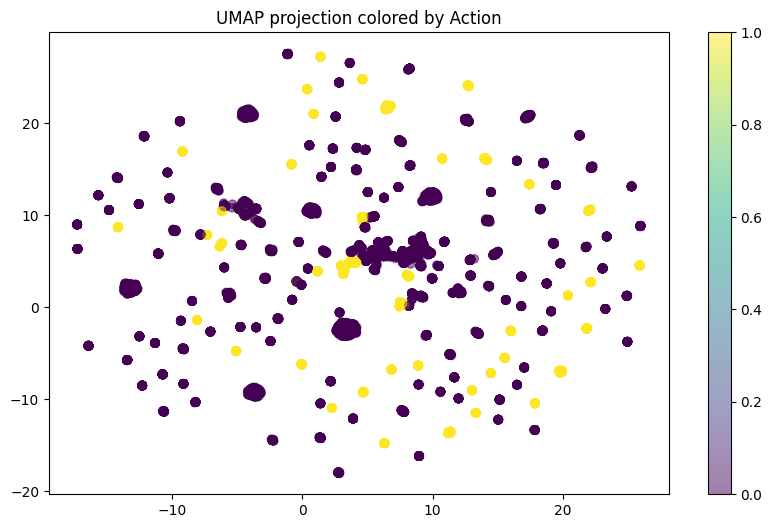

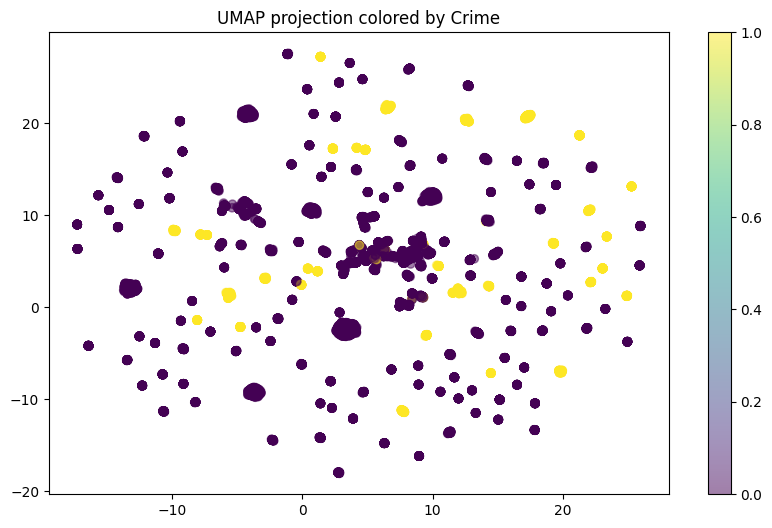

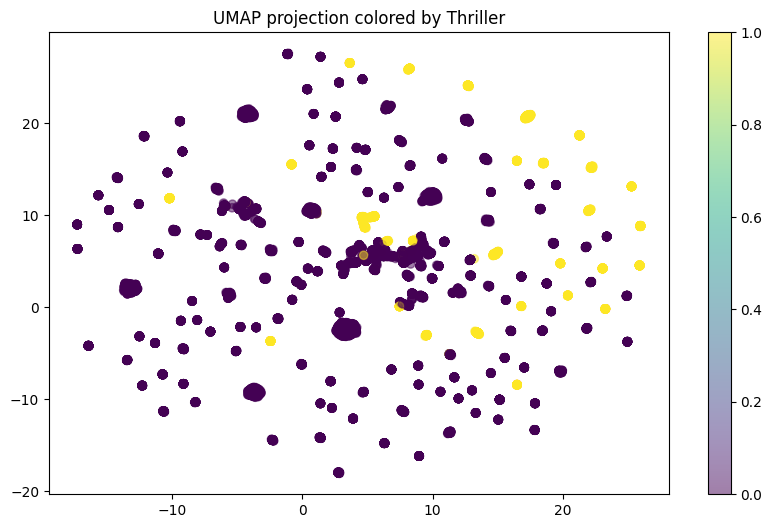

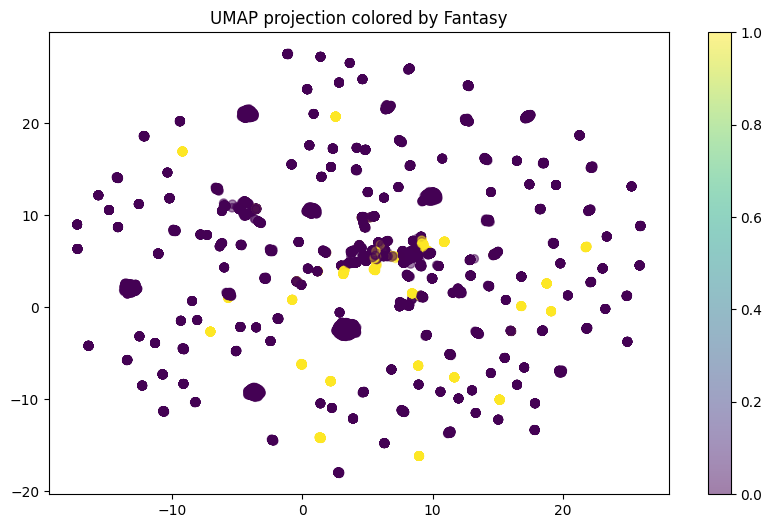

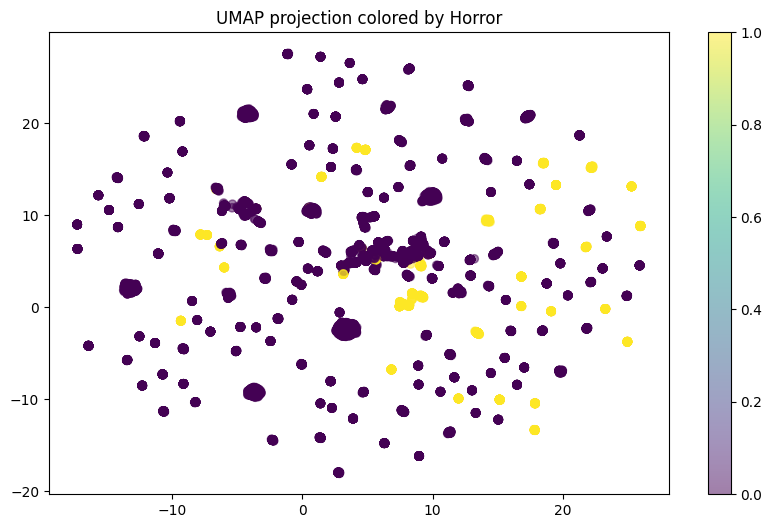

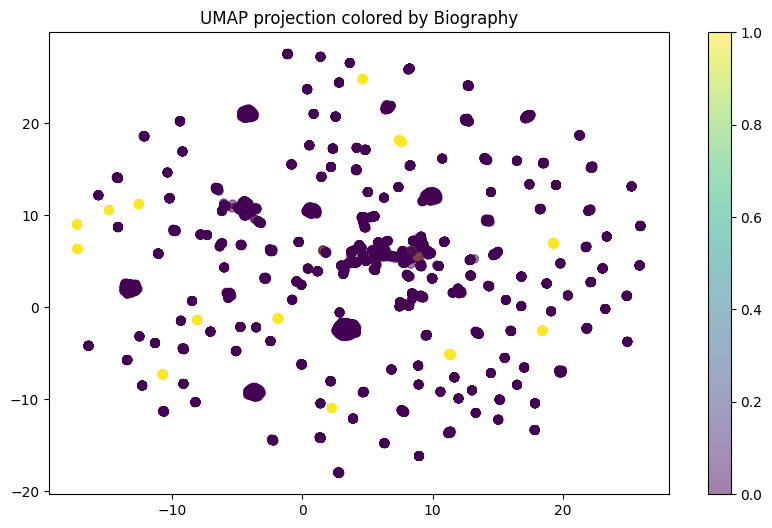

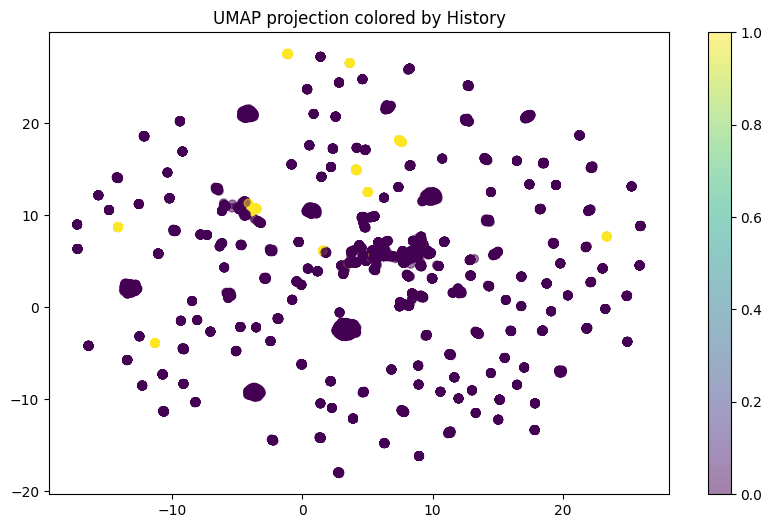

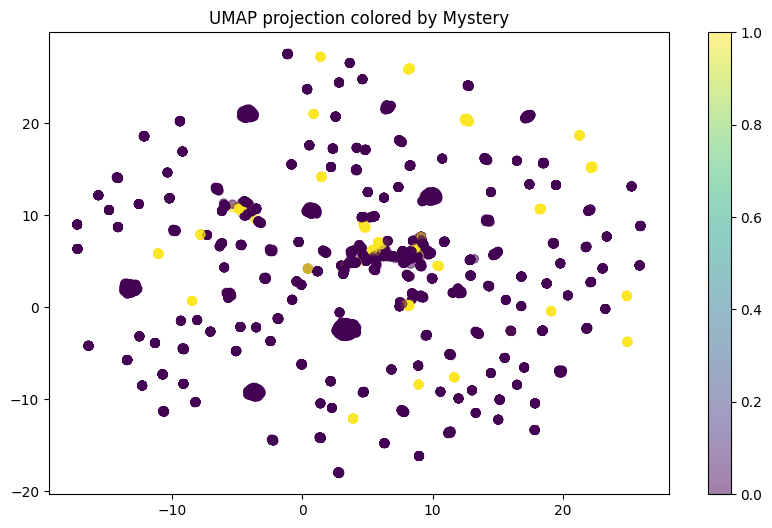

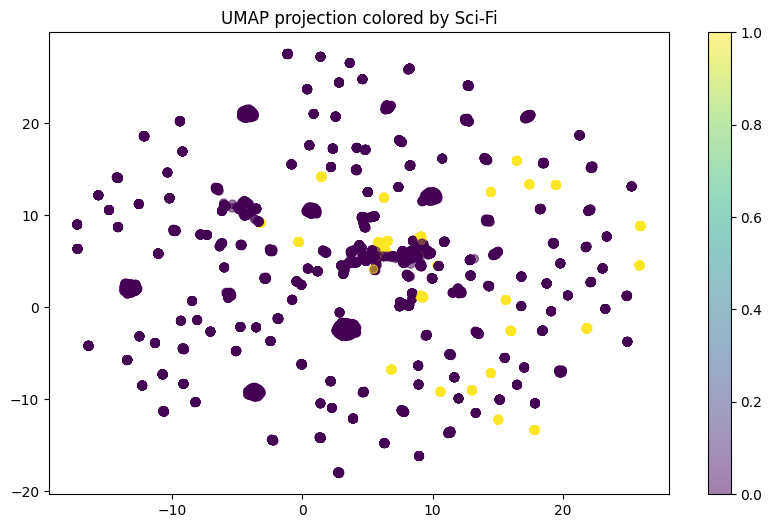

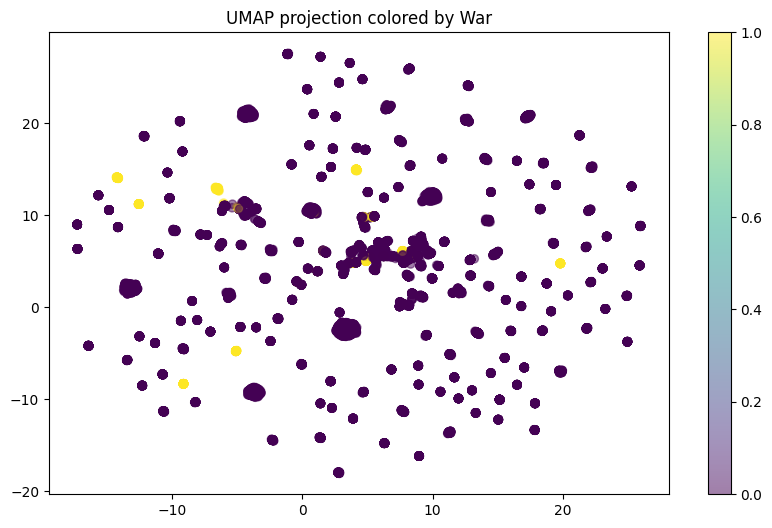

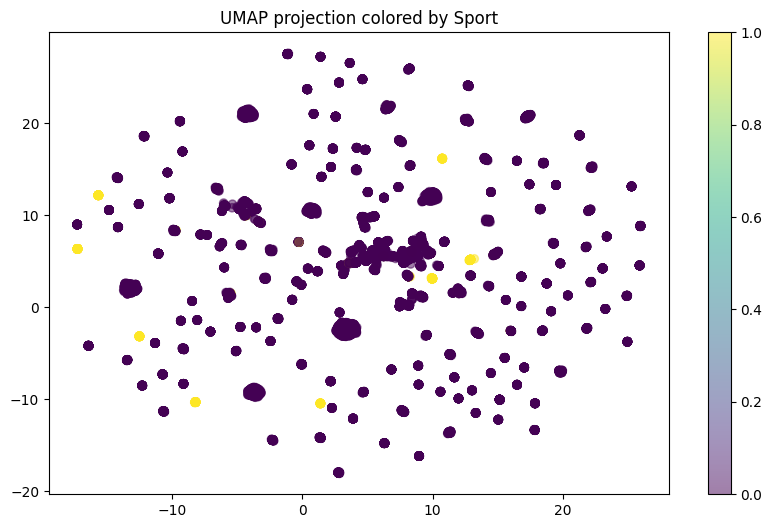

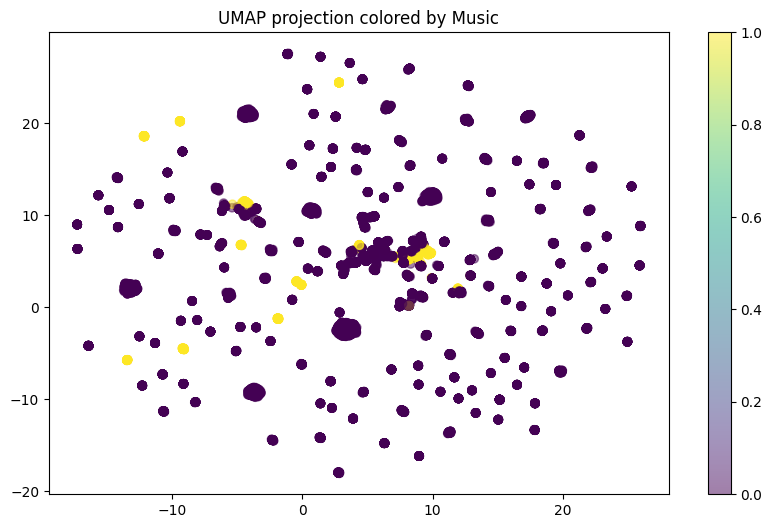

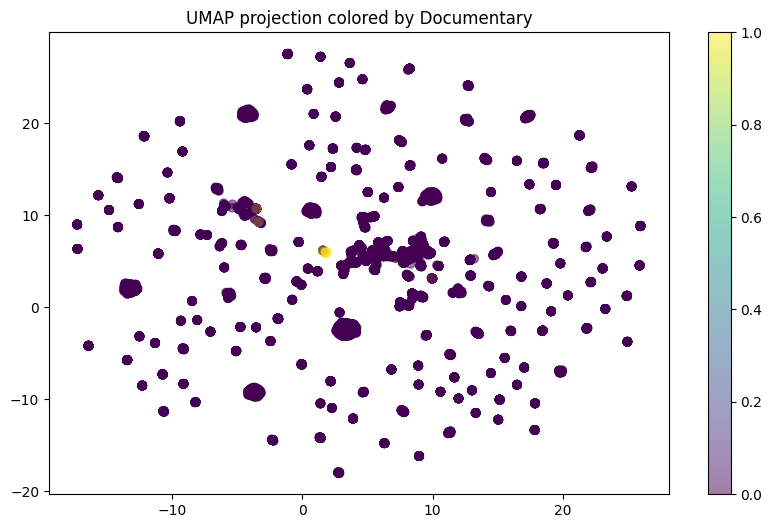

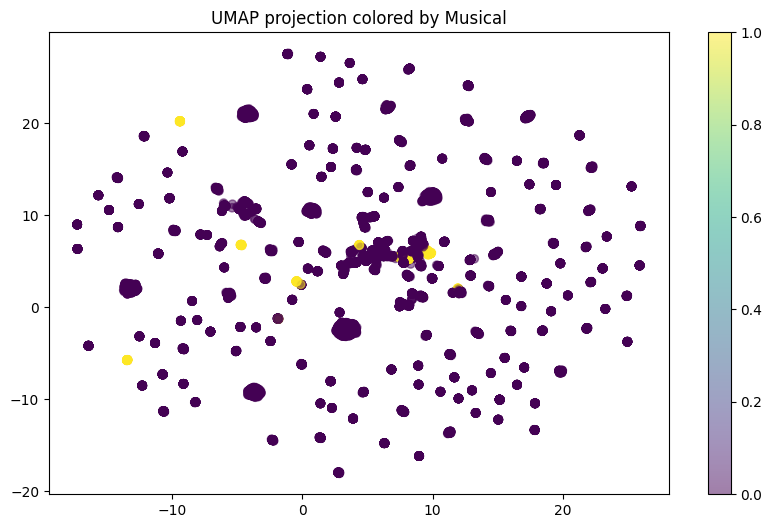

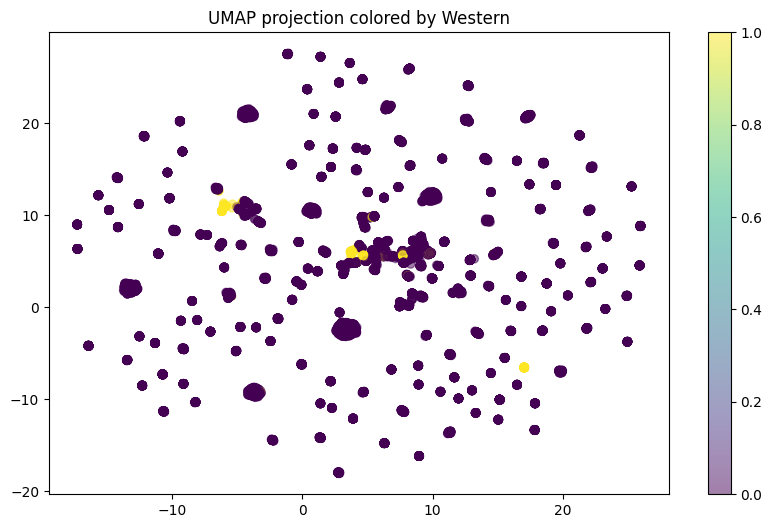

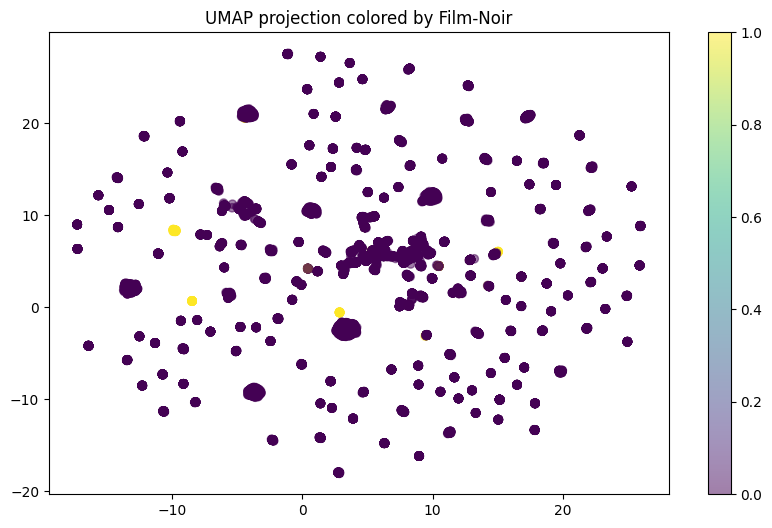

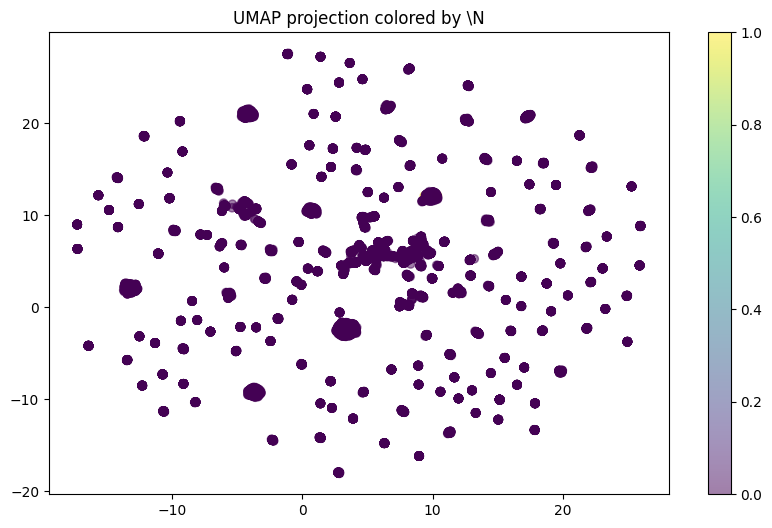

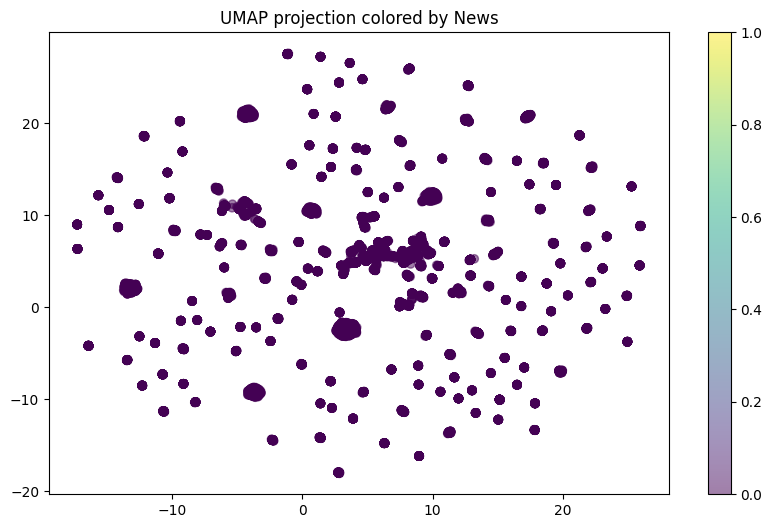

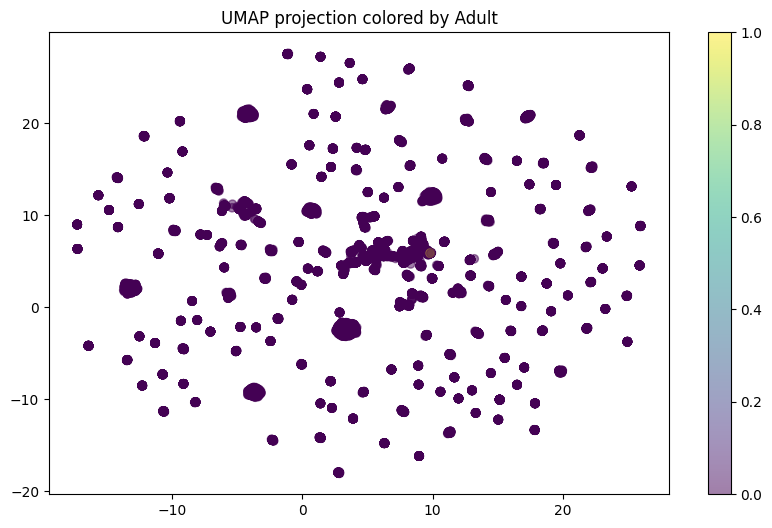

In [35]:
for genre in genre_columns:
    plt.figure(figsize=(10,6))
    scatter = plt.scatter(genres_umap[:,0], genres_umap[:,1], 
                         c=df_movieB[genre], 
                         cmap='viridis',
                         alpha=0.5)
    plt.colorbar(scatter)
    plt.title(f'UMAP projection colored by {genre}')
    plt.show()

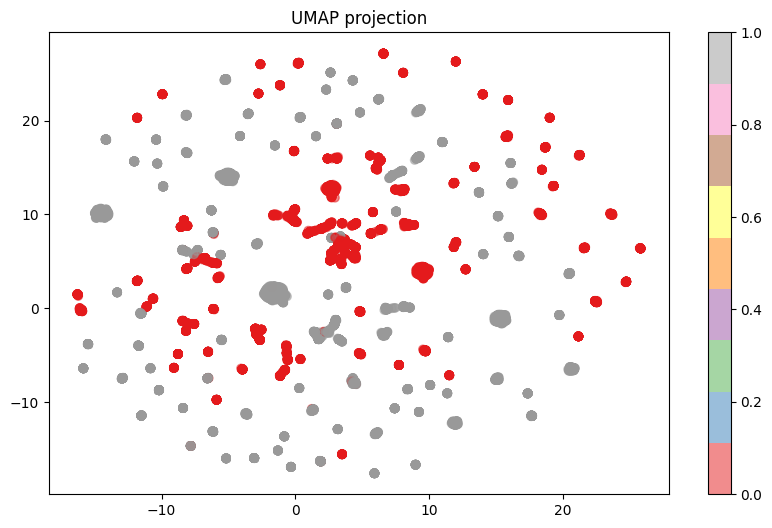

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(genres_umap[:,0], genres_umap[:,1], 
           c=df_movieB['Drama'], 
           cmap='Set1',
           alpha=0.5)
plt.title('UMAP projection')
plt.colorbar()

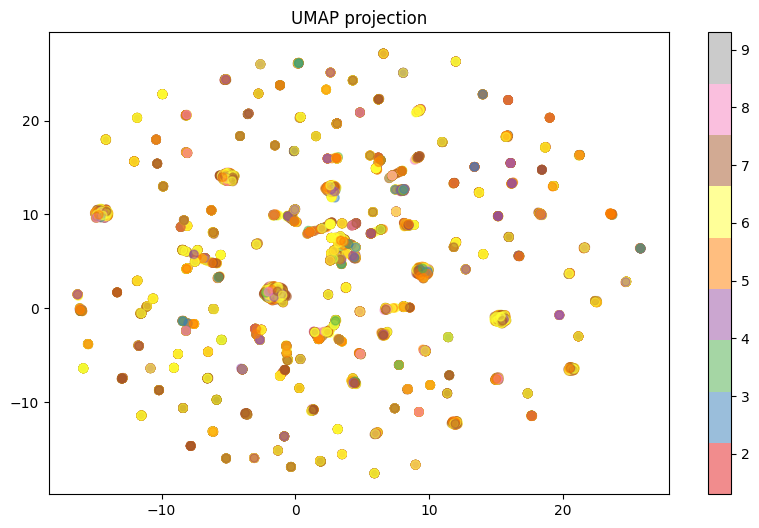

In [ ]:

plt.figure(figsize=(10,6))
plt.scatter(genres_umap[:,0], genres_umap[:,1], 
           c=df_movieB['averageRating'], 
           cmap='Set1',
           alpha=0.5)
plt.title('UMAP projection')
plt.colorbar()

In [ ]:
umap_model = umap.UMAP(n_neighbors = 15, min_dist = 0.1, n_components=2)
embedding = umap_model.fit_transform(data)

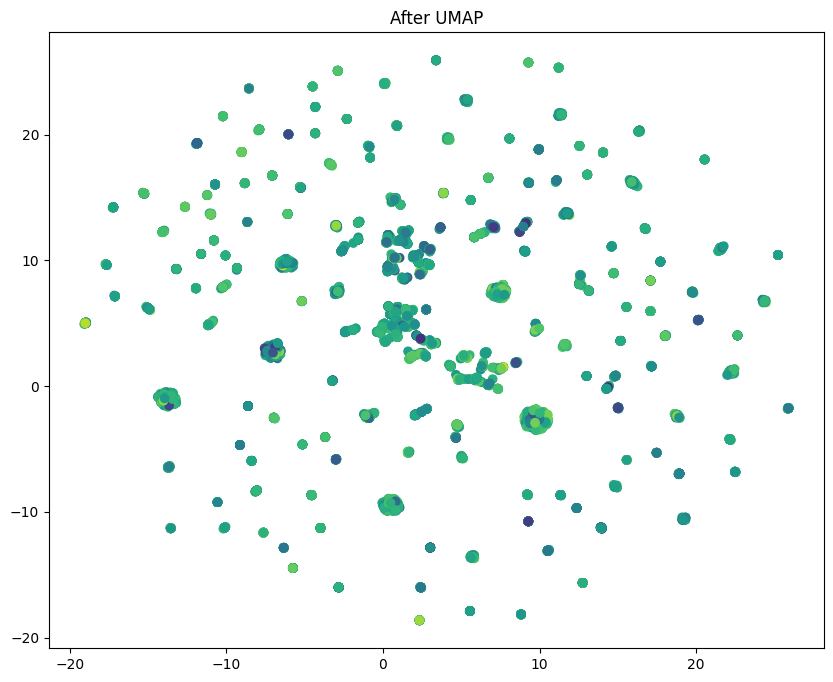

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(embedding[:, 0], embedding[:, 1], c = df_movieB['averageRating'])
plt.title("After UMAP")
plt.show();


In [36]:
umap_viz = umap.UMAP(
    n_neighbors=15,      # Try 5-50
    min_dist=0.1,       # Try 0.0-0.5
    n_components=2,      # For 2D visualization
    metric='cosine',     # Suitable for k-hot encoding
    random_state=42      # For reproducibility
)

In [37]:
embedding1 = umap_viz.fit_transform(df_movieB[genre_columns])

c:\Users\EFCA7255\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


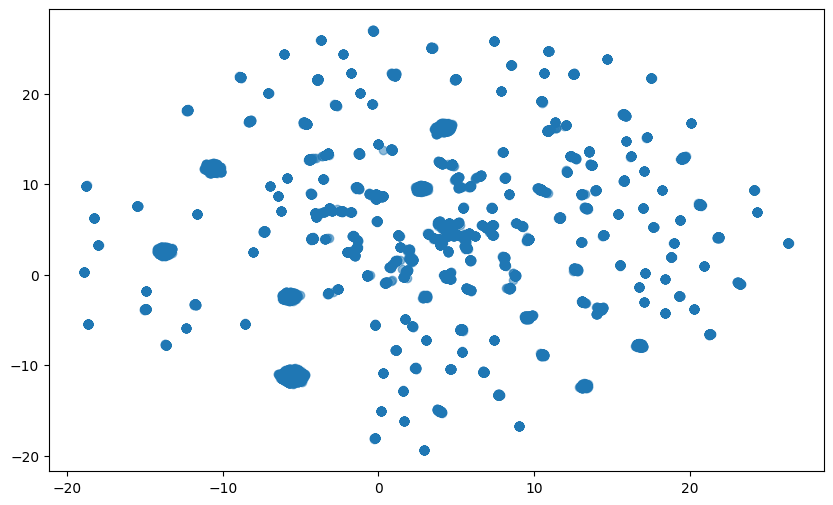

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(embedding1[:,0], embedding1[:,1], alpha=0.5)

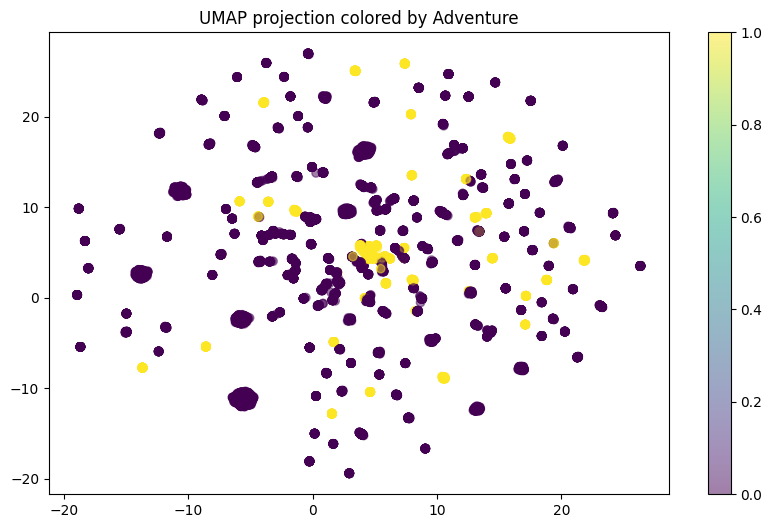

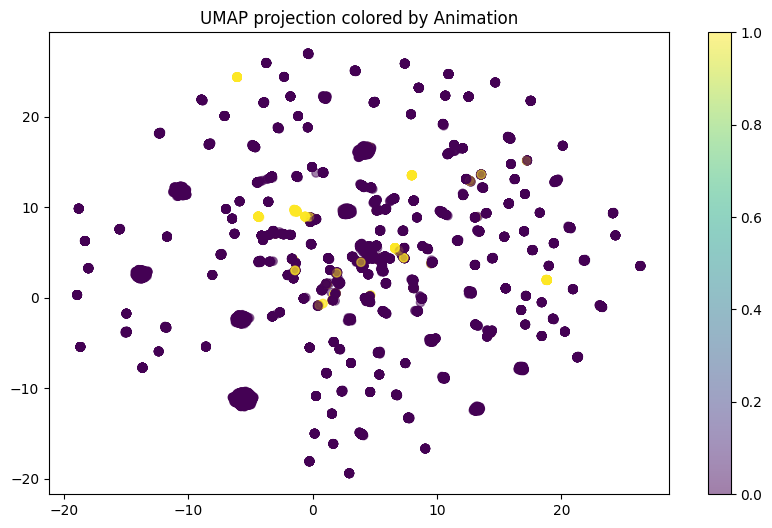

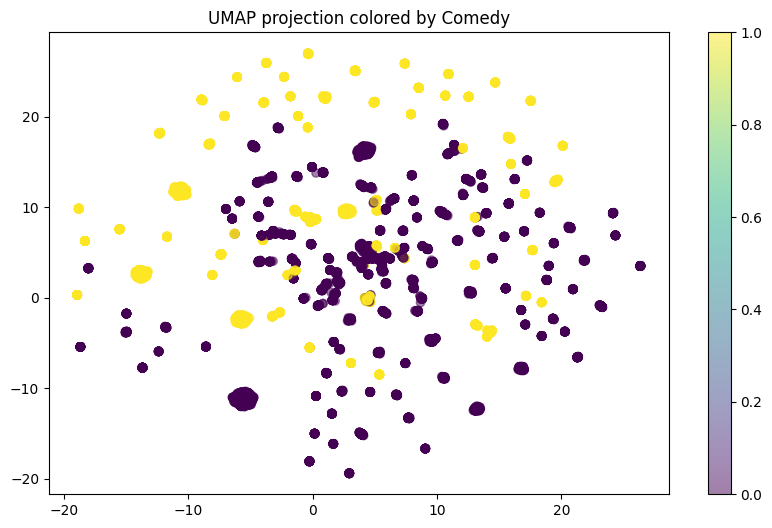

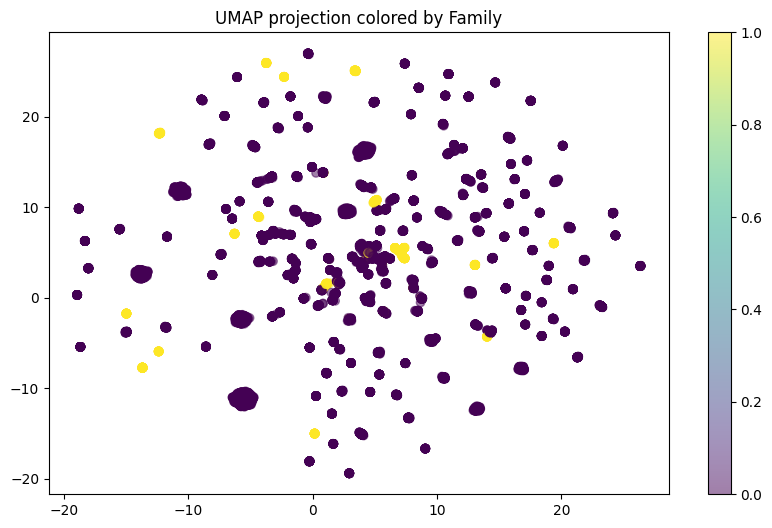

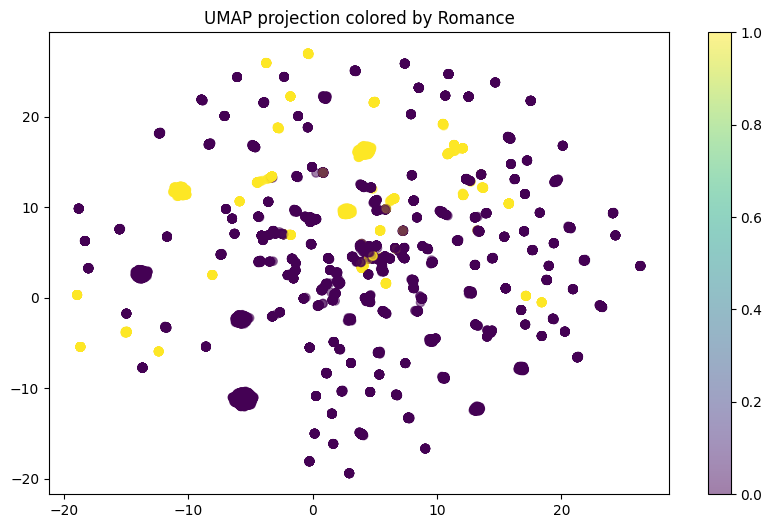

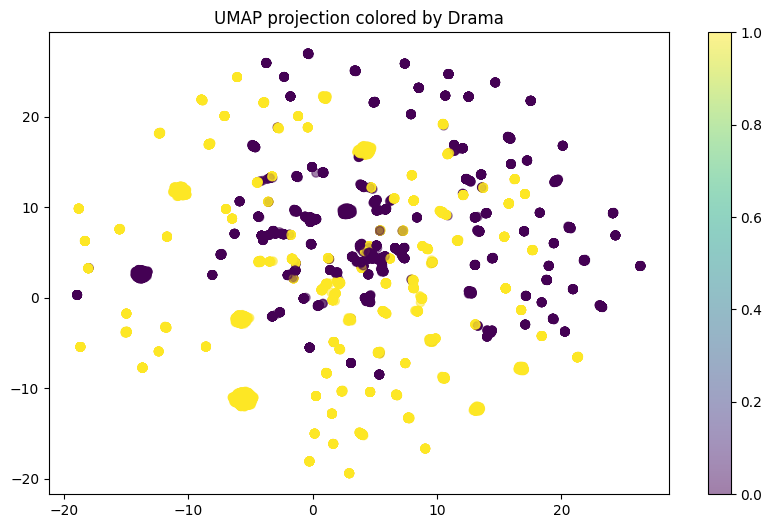

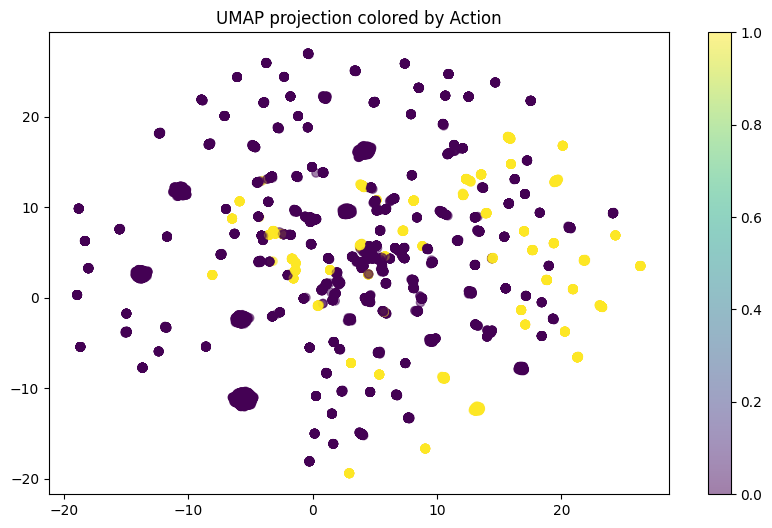

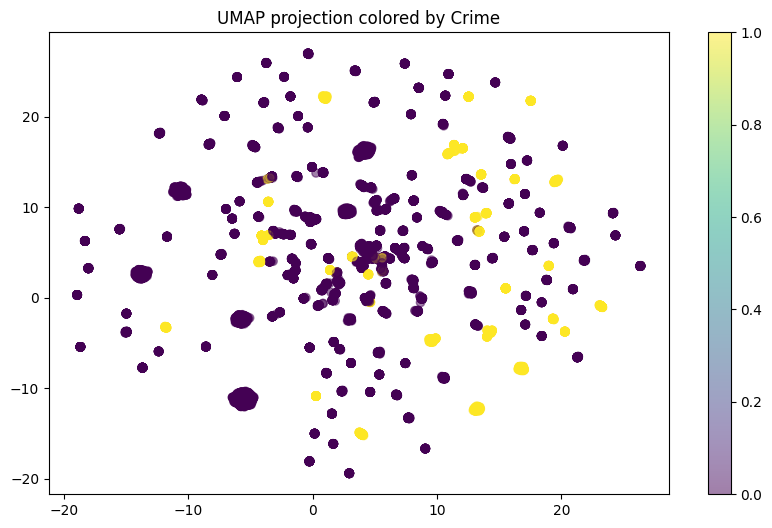

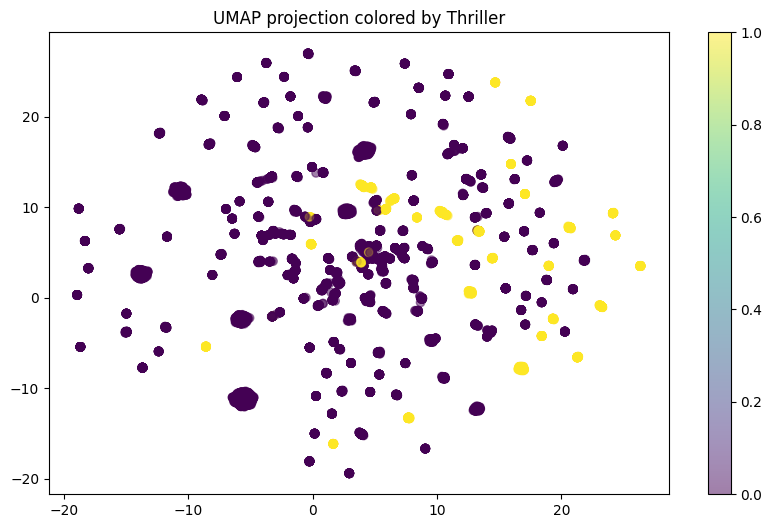

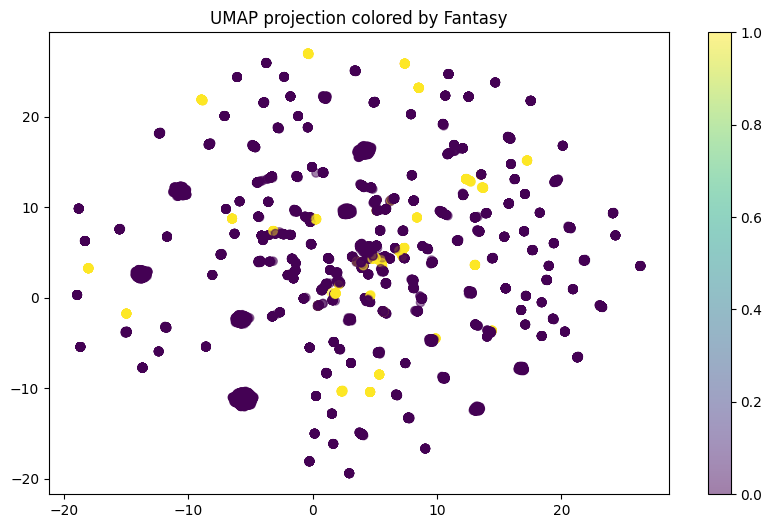

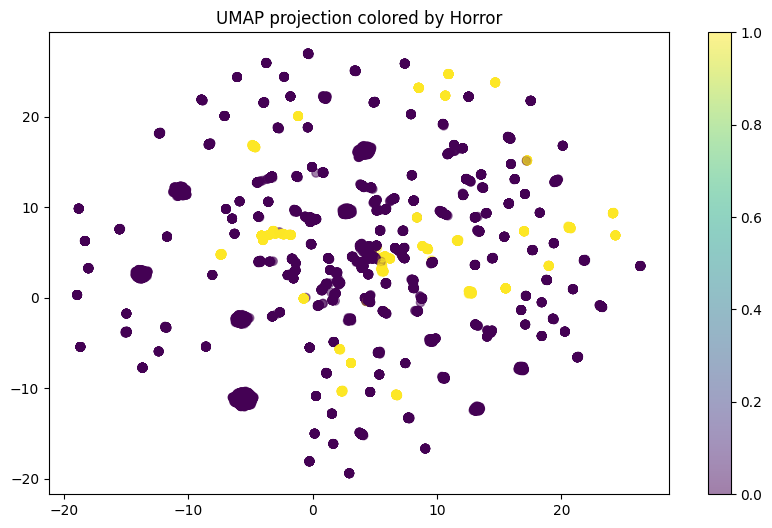

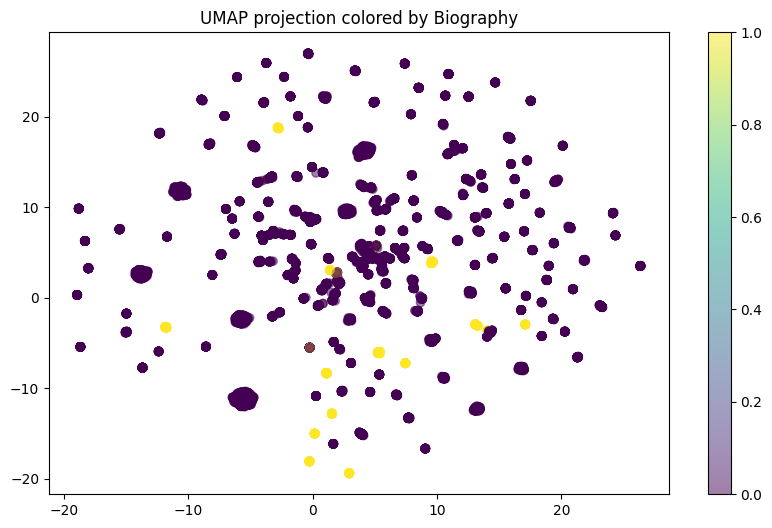

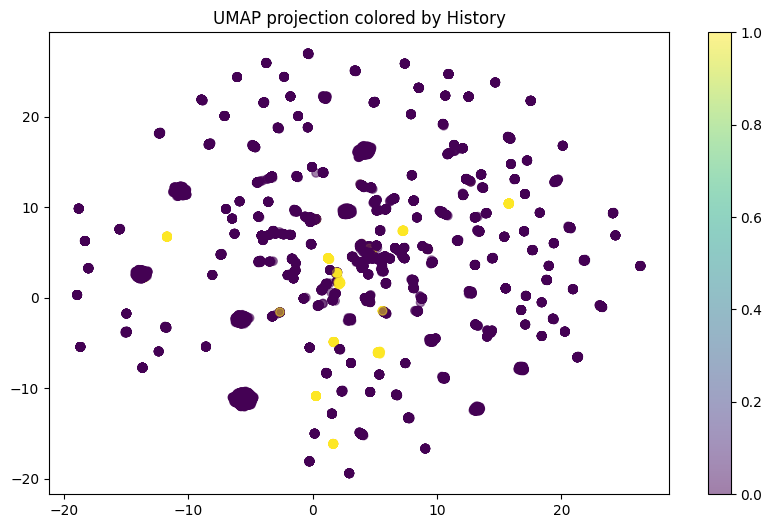

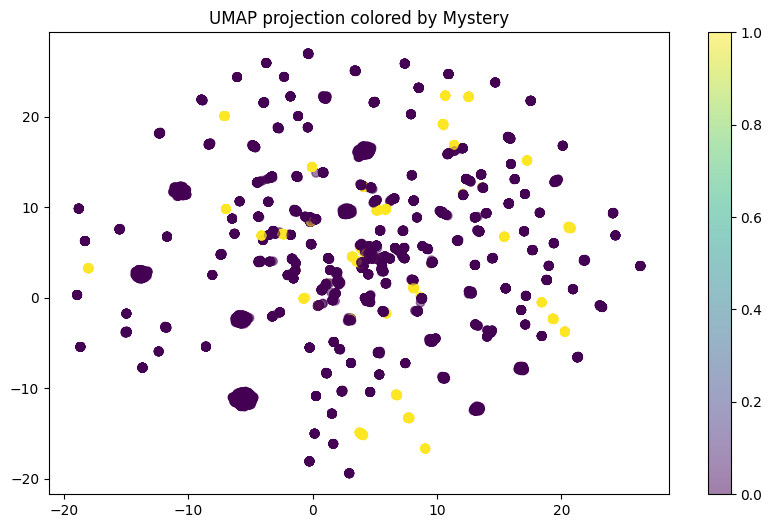

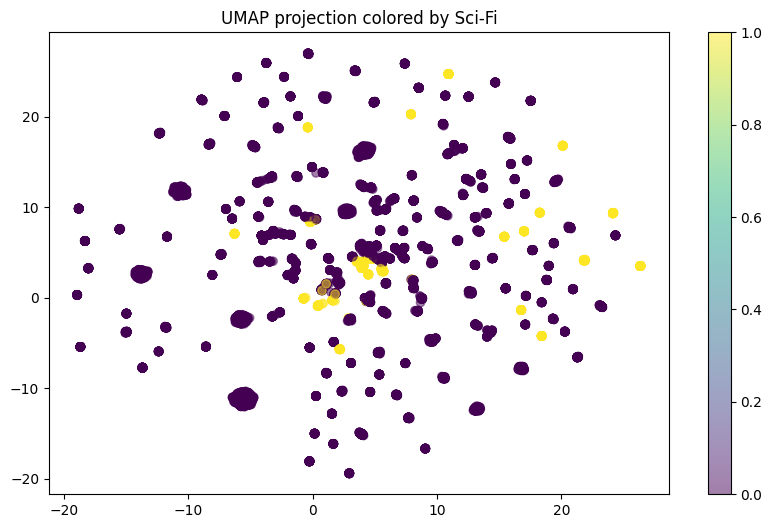

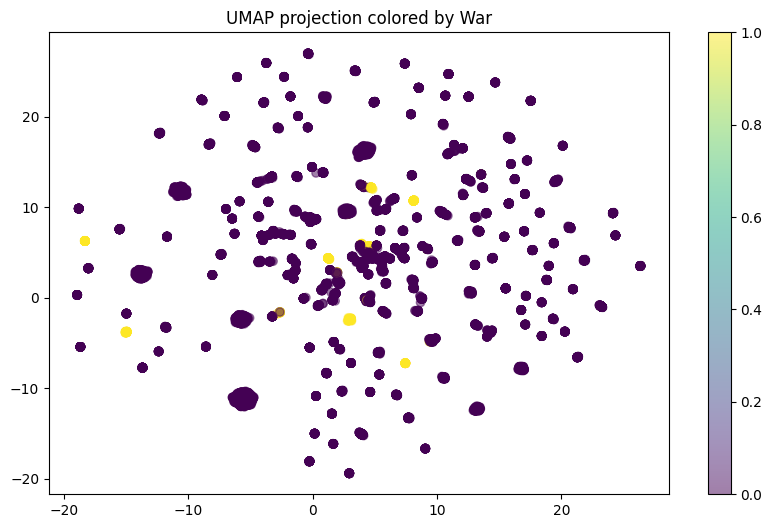

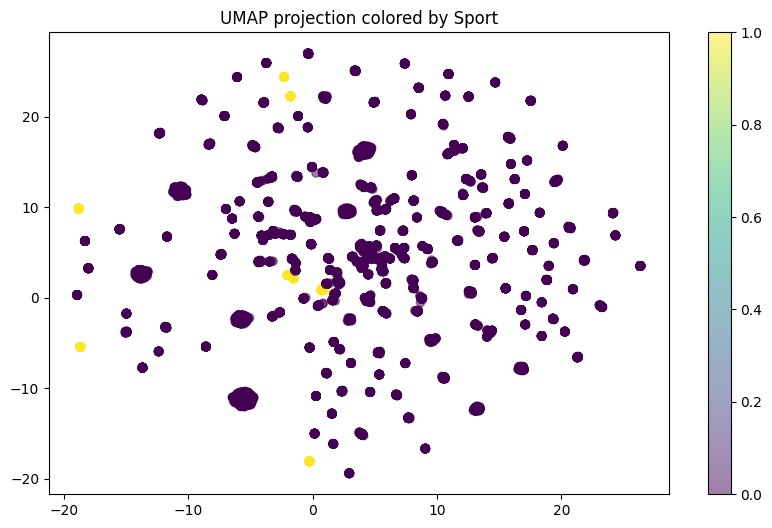

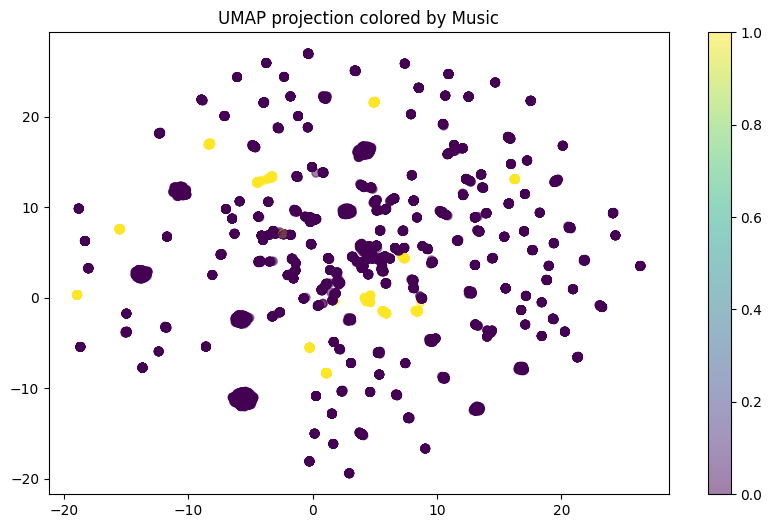

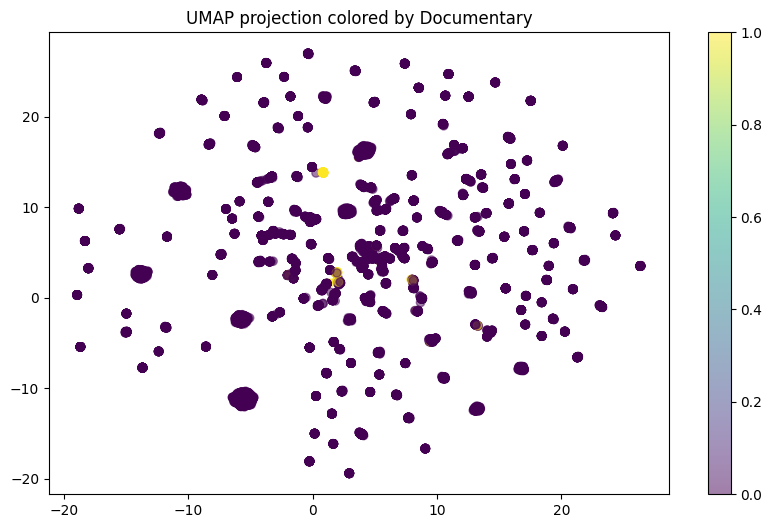

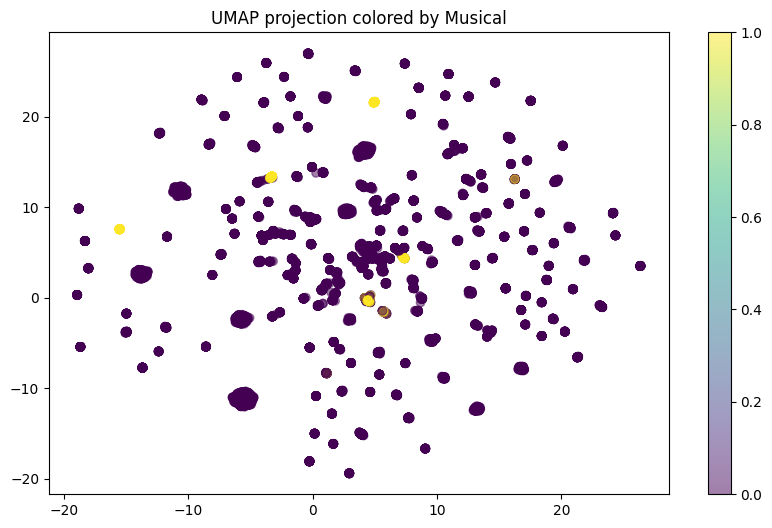

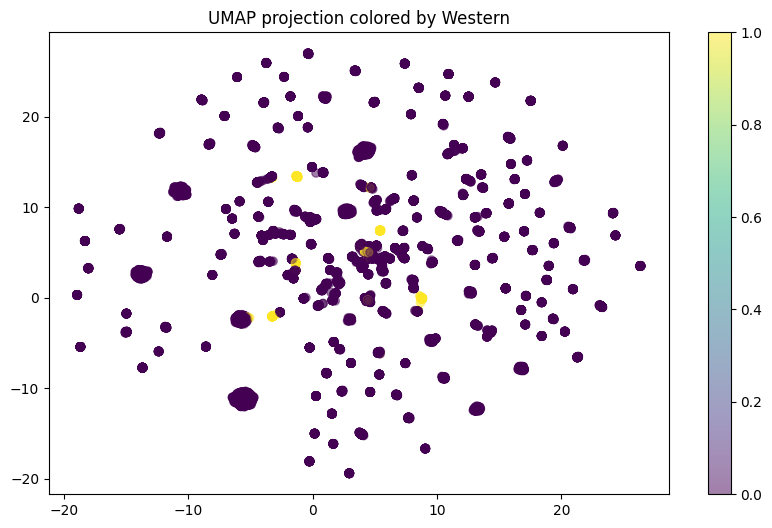

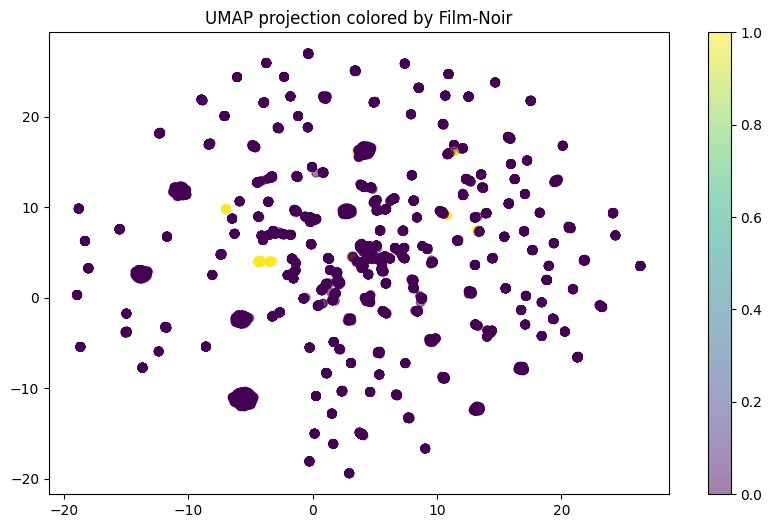

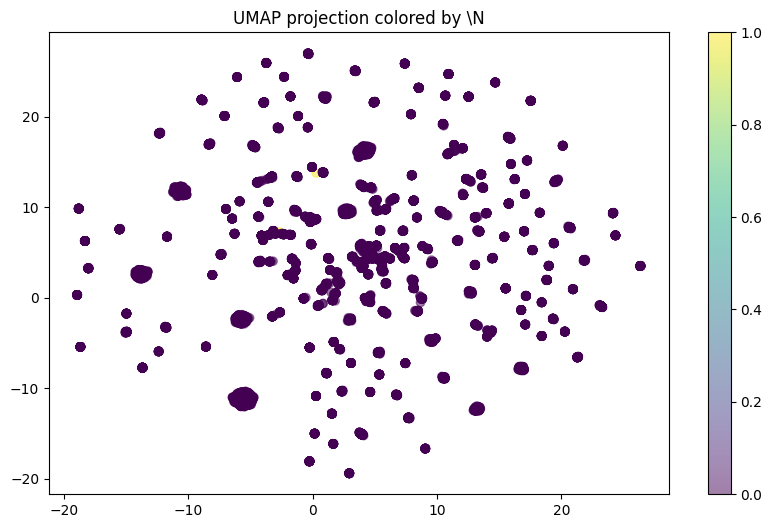

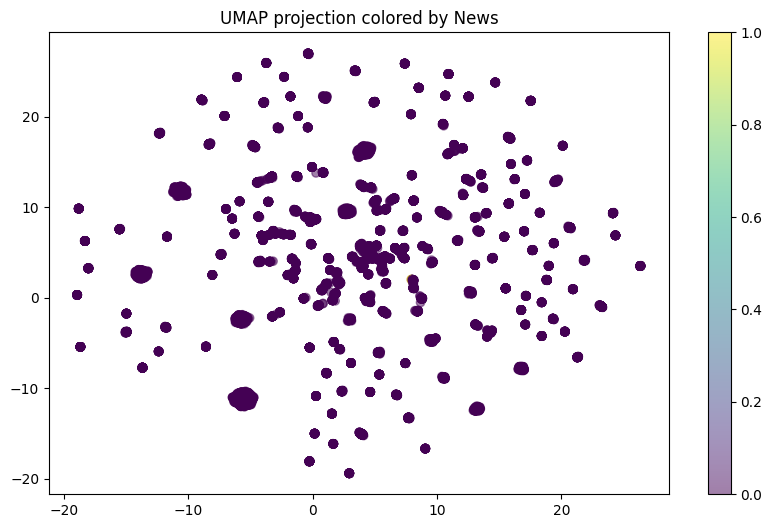

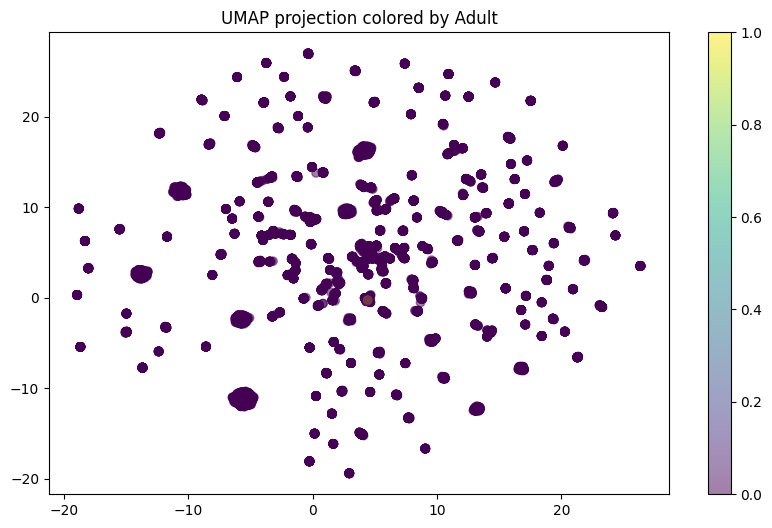

In [39]:
for genre in genre_columns:
    plt.figure(figsize=(10,6))
    scatter = plt.scatter(embedding1[:,0], embedding1[:,1], 
                         c=df_movieB[genre], 
                         cmap='viridis',
                         alpha=0.5)
    plt.colorbar(scatter)
    plt.title(f'UMAP projection colored by {genre}')
    plt.show()
